<table align="center" width=100%>
    <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                 <b>Playstore Games Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Team 1
</b> <br> </div>
                            <div align="left", style="font-size:150%">
                <font color="#21618C">
                    <br>
                    - Darshan R <br>
                    - Ismail Zain <br>
                    - Mehul GS <br>
                    - Vivek NG <br>
                   </br>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Problem Statement
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We have been provided with a dataset which consists of the list of games which are available to download on the Google Playstore for the Android OS. The dataset consists of the game title, along with other metadata which includes the google playstore ranking, the total number of ratings received, number of installs, avergae rating, the rate of growth in the initial days and the ratings received in the different start categories.

This dataset does not have a target variable by itself, so we will proceed with the analysis of the dataset by applying certain unsupervised learning algorithms to make sense of any pattern or meaningful information which can be obtained from the data at hand. We will also try to apply supervised learning algorithms at a later stage, when we have an idea about the cluster formation which can be obtained from the dataset.

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Contents
</b> <br> </div>
                            <div align="left", style="font-size:150%">
                <font color="#21618C">
                    <br>
                    - Dataset Description <br>
                    - Exploratory Data Analysis <br>
                    - Hierarchical Clustering <br>
                    - K-Means Clustering <br>
                    - DBSCAN Algorithm <br>
                    - Principal Components Analysis (PCA) <br>
                    - Random Forest Model <br>
                    - Model Optimization <br>
                    - Recommendation Systems <br>
                   </br>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Dataset Description
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The dataset consists of 1730 rows and 15 columns as described below:


- **rank**: The rank of the game in Google Playstore


- **title**: The title of the game


- **total ratings**: The total number of ratings received by the game


- **installs**: The total number of times the game has been installed


- **average rating**: The average of all the ratings received by the game


- **growth (30 days)**: The percentage growth in the first 30 days since upload


- **growth (60 days)**: The percentage growth in the first 60 days since upload


- **price**: The price incurred to play the game


- **category**: The category to which the game belongs


- **5 star ratings**: The number of 5 star ratings received by the game


- **4 star ratings**: The number of 4 star ratings received by the game


- **3 star ratings**: The number of 3 star ratings received by the game


- **2 star ratings**: The number of 2 star ratings received by the game


- **1 star ratings**: The number of 1 star ratings received by the game


- **paid**: Is the game paid or free

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Importing the required libraries
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# import functions to perform scaling and normalization
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# read the data
df = pd.read_csv("android-games.csv")

# display the first five rows of the data
df.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

In [4]:
df.shape

(1730, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [6]:
df['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
1000.0 M      2
100.0 k       2
Name: installs, dtype: int64

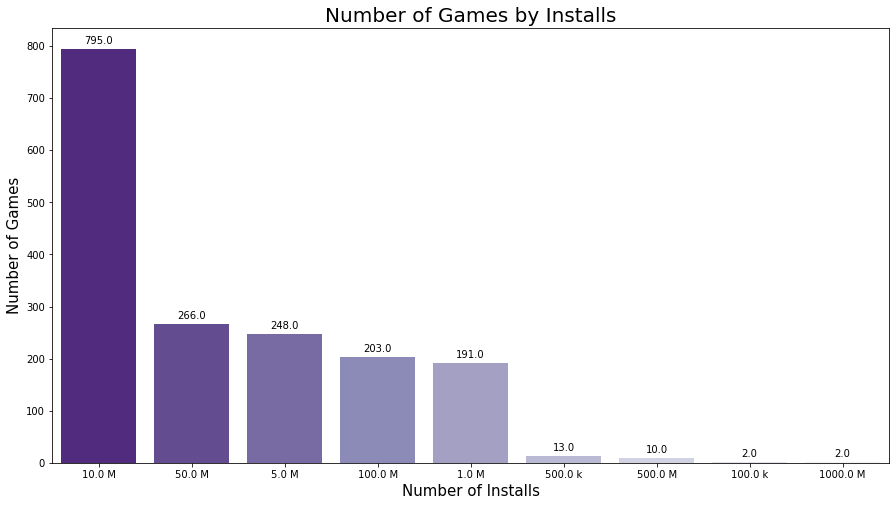

In [7]:
plt.figure(figsize= (15,8))

ax= sns.barplot(x= ['10.0 M','50.0 M','5.0 M','100.0 M','1.0 M','500.0 k','500.0 M','100.0 k','1000.0 M'],y=df['installs'].value_counts(),
                 palette= 'Purples_r')
plt.title('Number of Games by Installs', fontsize= 20)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height+10,
           '{:.1f}'.format(height), ha= 'center')

plt.xlabel('Number of Installs',fontsize='15')
plt.ylabel('Number of Games',fontsize='15')
plt.show()

In [8]:
# converting the installs to a numeric variable for use in further analysis

num = []
for i in df['installs']:
    if i.split(' ')[1] == 'M':
        num.append(int(i.split('.')[0]) * 1000000)
    else:
        num.append(int(i.split('.')[0]) * 1000)

In [9]:
df['installs'] = num

In [10]:
df['installs'].value_counts()

10000000      795
50000000      266
5000000       248
100000000     203
1000000       191
500000         13
500000000      10
1000000000      2
100000          2
Name: installs, dtype: int64

In [11]:
df.drop(['paid','price'],axis=1,inplace=True)

In [12]:
# Considering 5 and 4 star rating as High rating, 3 as average rating and the rest as low rating:
# Total of ratings
df['High ratings'] = df['4 star ratings'] + df['5 star ratings']
df['Average ratings'] = df['3 star ratings']
df['Low ratings'] = df['1 star ratings'] + df['2 star ratings'] 

# Percent of ratings
df['High ratings percent']= (df['High ratings'] / (df['High ratings'] + df['Average ratings'] + df['Low ratings']))*100
df['Average ratings percent']= (df['Average ratings'] / (df['High ratings'] + df['Average ratings'] + df['Low ratings']))*100
df['Low ratings percent']= (df['Low ratings'] / (df['High ratings'] + df['Average ratings'] + df['Low ratings']))*100

df.head(2)

rank                         title  total ratings   installs  \
0     1  Garena Free Fire - The Cobra       80678661  500000000   
1     2   PUBG MOBILE: Graffiti Prank       35971961  100000000   

   average rating  growth (30 days)  growth (60 days)     category  \
0            4.33               2.9               7.9  GAME ACTION   
1            4.24               2.0               3.1  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   

   1 star ratings  High ratings  Average ratings  Low ratings  \
0         9654037      66414450          2795172     11469036   
1         4945478      28780197          1352610      5839152   

   High ratings percent  Average ratings percent  Low ratings percent  
0             82.319726                 3.464574             14.21570  
1             80.007311                 3.760179             16.23251

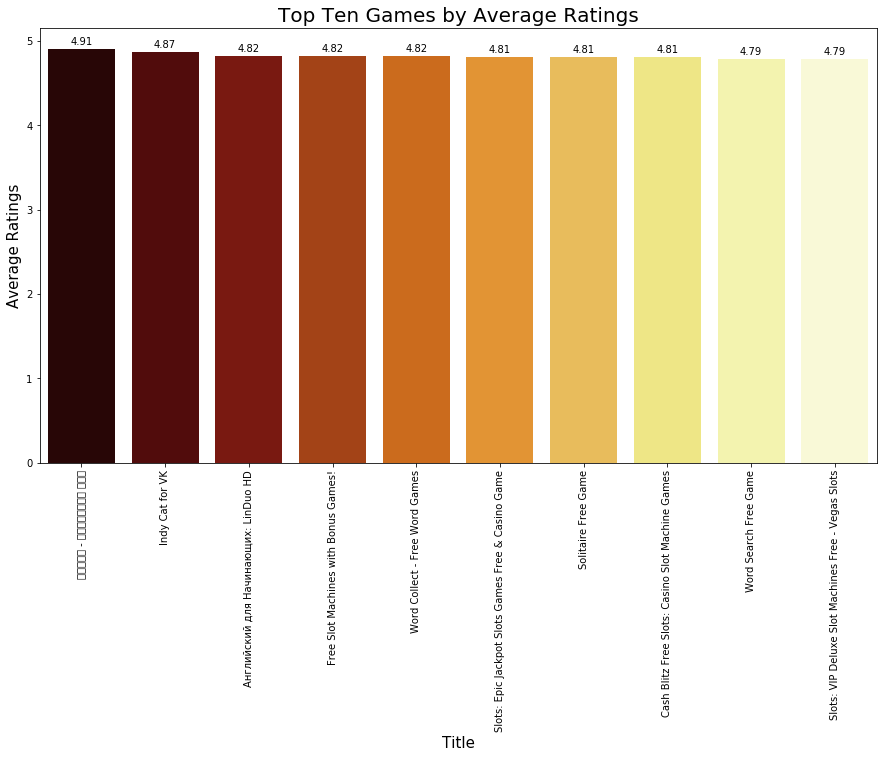

In [13]:
plt.figure(figsize= (15,8))

ax= sns.barplot(x= 'title', y= 'average rating', data= df, 
                order= df.sort_values('average rating', ascending= False).head(10).title, palette= 'afmhot')
plt.title('Top Ten Games by Average Ratings', fontsize= 20)
plt.xticks(rotation= 90)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 0.05,
           '{:.2f}'.format(height), ha= 'center')

plt.xlabel('Title',fontsize='15')
plt.ylabel('Average Ratings',fontsize='15')
plt.show()

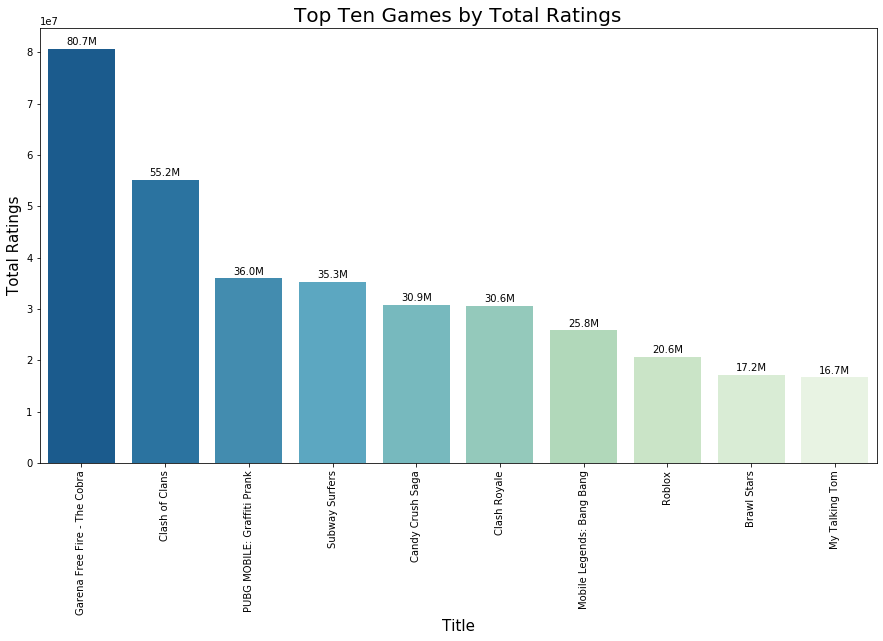

In [14]:
plt.figure(figsize= (15,8))

ax= sns.barplot(x= 'title', y= 'total ratings', data= df, 
                order= df.sort_values('total ratings', ascending= False).head(10).title, palette= 'GnBu_r')
plt.title('Top Ten Games by Total Ratings', fontsize= 20)
plt.xticks(rotation= 90)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 700000,
           '{:.1f}M'.format(height/1000000), ha= 'center')

plt.xlabel('Title',fontsize='15')
plt.ylabel('Total Ratings',fontsize='15')
plt.show()

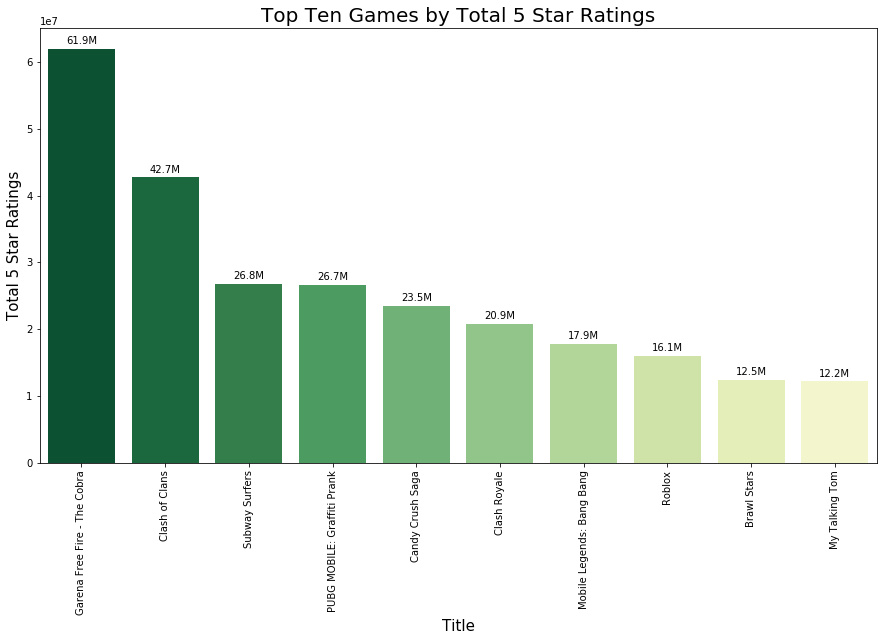

In [15]:
plt.figure(figsize= (15,8))

ax= sns.barplot(x= 'title', y= '5 star ratings', data= df, 
                order= df.sort_values('5 star ratings', ascending= False).head(10).title, palette= 'YlGn_r')
plt.title('Top Ten Games by Total 5 Star Ratings', fontsize= 20)
plt.xticks(rotation= 90)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 700000,
           '{:.1f}M'.format(height/1000000), ha= 'center')

plt.xlabel('Title',fontsize='15')
plt.ylabel('Total 5 Star Ratings',fontsize='15')
plt.show()

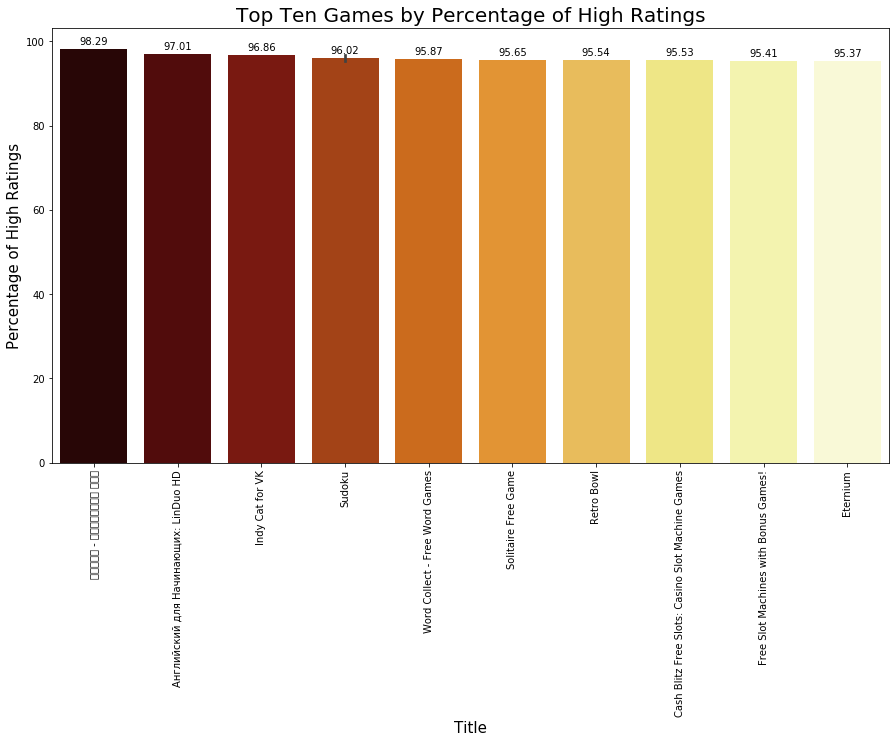

In [16]:
plt.figure(figsize= (15,8))

ax= sns.barplot(x= 'title', y= 'High ratings percent', data= df, 
                order= df.sort_values('High ratings percent', ascending= False).head(10).title, palette= 'afmhot')
plt.title('Top Ten Games by Percentage of High Ratings', fontsize= 20)
plt.xticks(rotation= 90)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 1,
           '{:.2f}'.format(height), ha= 'center')

plt.xlabel('Title',fontsize='15')
plt.ylabel('Percentage of High Ratings',fontsize='15')
plt.show()

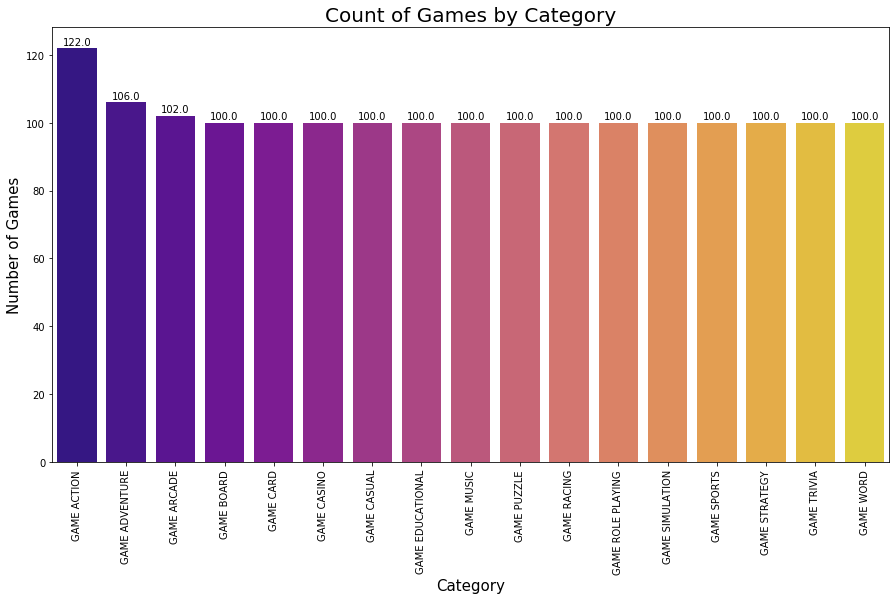

In [17]:
plt.figure(figsize= (15,8))

ax= sns.barplot(x = df['category'].unique(), y = df['category'].value_counts(), data= df, palette= 'plasma')
plt.title('Count of Games by Category', fontsize= 20)
plt.xticks(rotation= 90)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 1,
           '{:}'.format(height), ha= 'center')

plt.xlabel('Category',fontsize='15')
plt.ylabel('Number of Games',fontsize='15')
plt.show()

In [18]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'category', '5 star ratings',
       '4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings',
       'High ratings', 'Average ratings', 'Low ratings',
       'High ratings percent', 'Average ratings percent',
       'Low ratings percent'],
      dtype='object')

In [19]:
df.drop(['5 star ratings','4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     1730 non-null   int64  
 1   title                    1730 non-null   object 
 2   total ratings            1730 non-null   int64  
 3   installs                 1730 non-null   int64  
 4   average rating           1730 non-null   float64
 5   growth (30 days)         1730 non-null   float64
 6   growth (60 days)         1730 non-null   float64
 7   category                 1730 non-null   object 
 8   High ratings             1730 non-null   int64  
 9   Average ratings          1730 non-null   int64  
 10  Low ratings              1730 non-null   int64  
 11  High ratings percent     1730 non-null   float64
 12  Average ratings percent  1730 non-null   float64
 13  Low ratings percent      1730 non-null   float64
dtypes: float64(6), int64(6),

In [21]:
df.describe()

rank  total ratings      installs  average rating  \
count  1730.000000   1.730000e+03  1.730000e+03     1730.000000   
mean     50.475723   1.101182e+06  2.889462e+07        4.313410   
std      28.941630   3.311738e+06  5.810044e+07        0.253545   
min       1.000000   3.823800e+04  1.000000e+05        3.090000   
25%      25.000000   1.879988e+05  5.000000e+06        4.180000   
50%      51.000000   4.576750e+05  1.000000e+07        4.330000   
75%      75.750000   9.443342e+05  5.000000e+07        4.490000   
max     100.000000   8.067866e+07  1.000000e+09        4.910000   

       growth (30 days)  growth (60 days)  High ratings  Average ratings  \
count       1730.000000       1730.000000  1.730000e+03     1.730000e+03   
mean         193.167341          3.969249  9.100303e+05     5.954986e+04   
std         4775.617650         18.912904  2.761451e+06     1.447400e+05   
min            0.000000          0.000000  2.663500e+04     7.070000e+02   
25%            0.100000          0.300000  1.574232e+05     1.027775e+04   
50%            0.500000          1.000000  3.676170e+05     2.665850e+04   
75%            1.600000          3.300000  7.759778e+05     5.581750e+04   
max       140394.400000        605.100000  6.641445e+07     2.795172e+06   

        Low ratings  High ratings percent  Average ratings percent  \
count  1.730000e+03           1730.000000              1730.000000   
mean   1.315988e+05             82.200989                 5.889353   
std    4.342361e+05              7.270490                 2.068427   
min    8.150000e+02             48.731953                 0.910024   
25%    1.842150e+04             78.216136                 4.559659   
50%    4.722150e+04             82.667720                 5.741220   
75%    1.112700e+05             87.367990                 6.955119   
max    1.146904e+07             98.294662                17.786043   

       Low ratings percent  
count          1730.000000  
mean             11.909658  
std               6.183109  
min               0.795315  
25%               7.220126  
50%              11.217507  
75%              15.358730  
max              43.948247

In [22]:
df.isnull().sum()

rank                       0
title                      0
total ratings              0
installs                   0
average rating             0
growth (30 days)           0
growth (60 days)           0
category                   0
High ratings               0
Average ratings            0
Low ratings                0
High ratings percent       0
Average ratings percent    0
Low ratings percent        0
dtype: int64

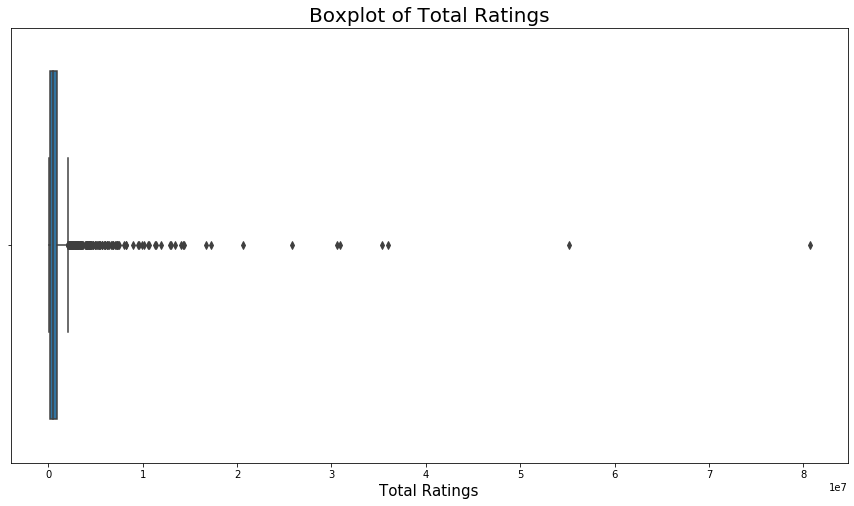

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(df['total ratings'])
plt.xlabel('Total Ratings',fontsize=15)
plt.title('Boxplot of Total Ratings',fontsize=20)
plt.show()

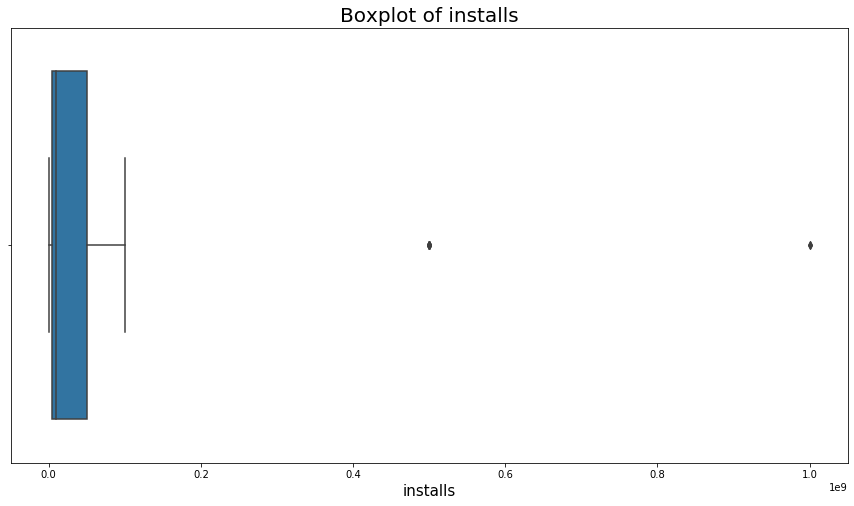

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(df['installs'])
plt.xlabel('installs',fontsize=15)
plt.title('Boxplot of installs',fontsize=20)
plt.show()

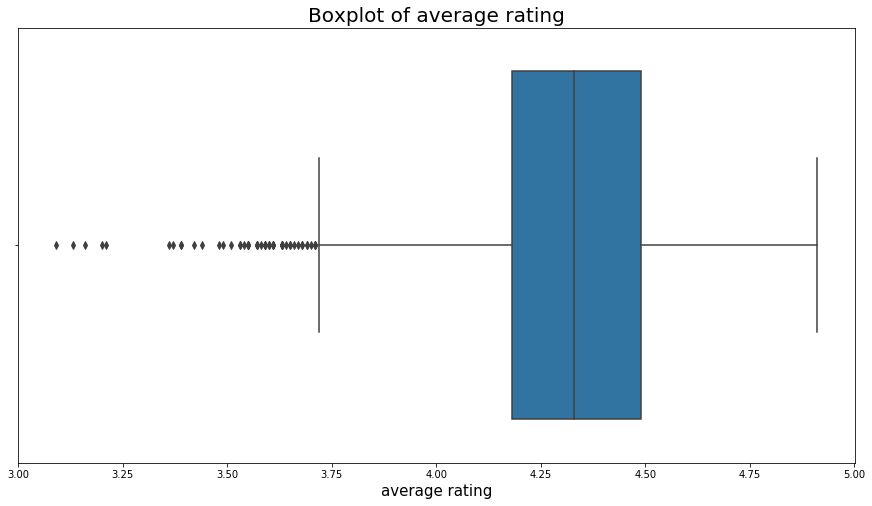

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(df['average rating'])
plt.xlabel('average rating',fontsize=15)
plt.title('Boxplot of average rating',fontsize=20)
plt.show()

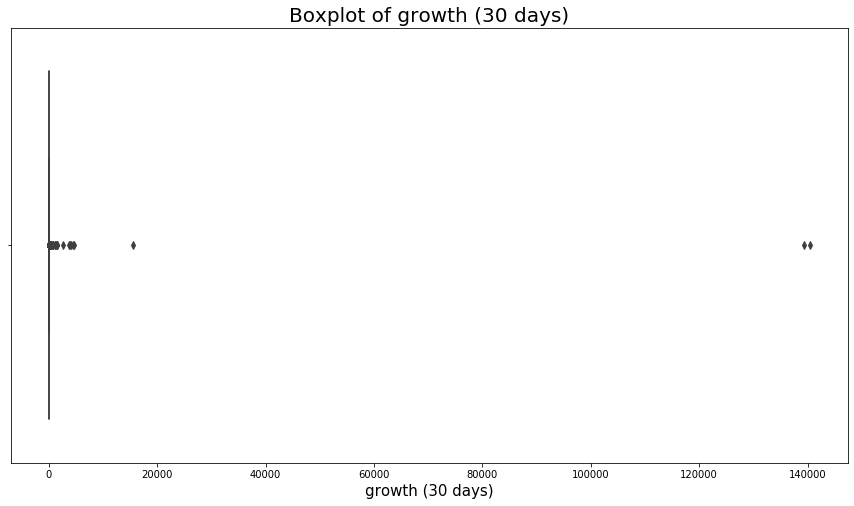

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(df['growth (30 days)'])
plt.xlabel('growth (30 days)',fontsize=15)
plt.title('Boxplot of growth (30 days)',fontsize=20)
plt.show()

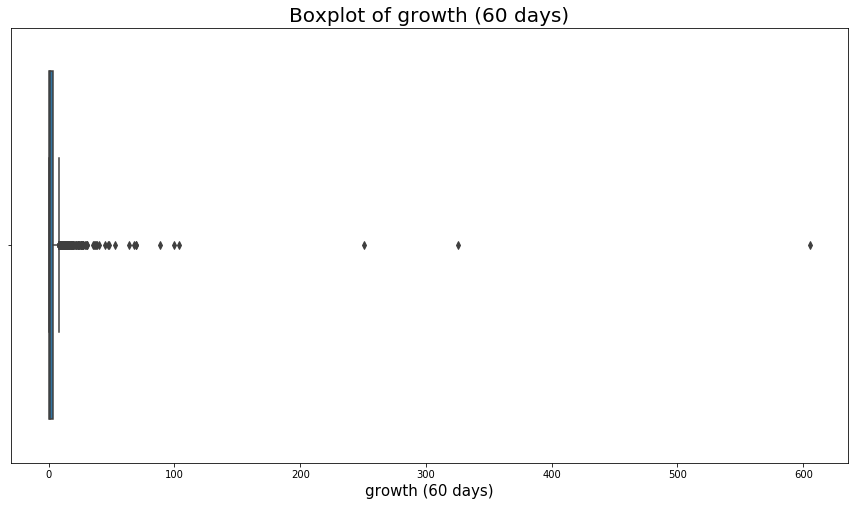

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(df['growth (60 days)'])
plt.xlabel('growth (60 days)',fontsize=15)
plt.title('Boxplot of growth (60 days)',fontsize=20)
plt.show()

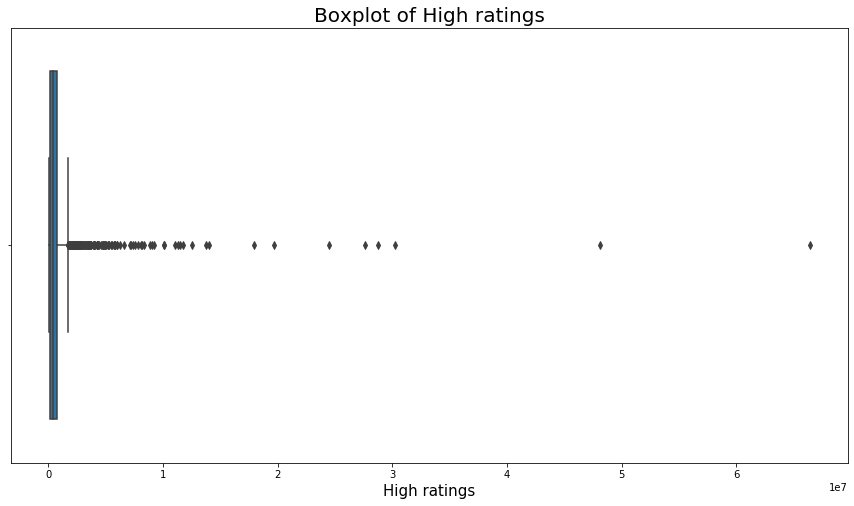

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(df['High ratings'])
plt.xlabel('High ratings',fontsize=15)
plt.title('Boxplot of High ratings',fontsize=20)
plt.show()

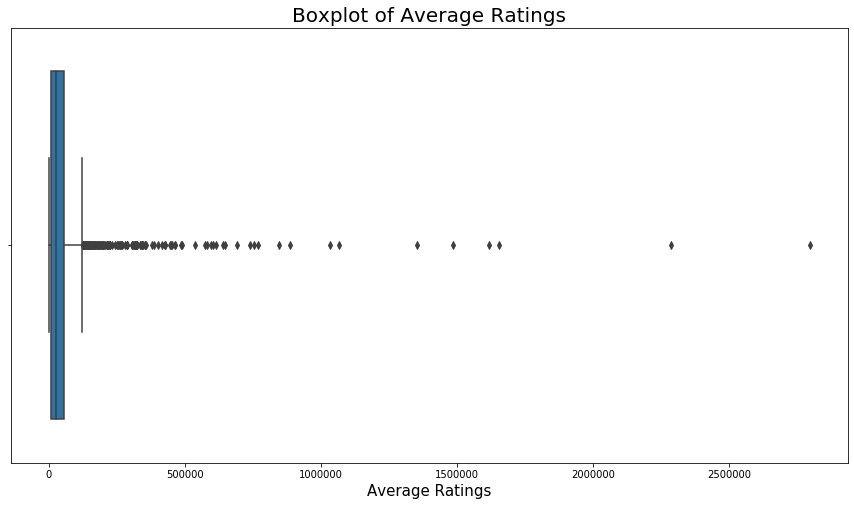

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Average ratings'])
plt.xlabel('Average Ratings',fontsize=15)
plt.title('Boxplot of Average Ratings',fontsize=20)
plt.show()

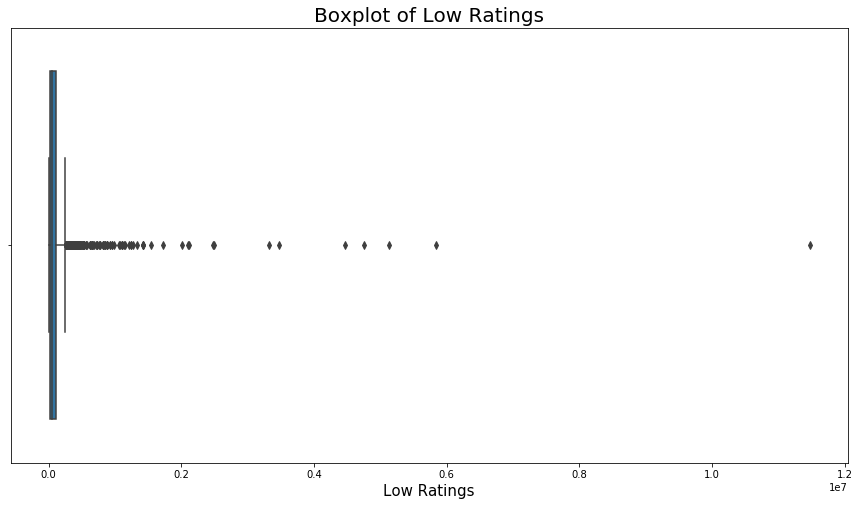

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Low ratings'])
plt.xlabel('Low Ratings',fontsize=15)
plt.title('Boxplot of Low Ratings',fontsize=20)
plt.show()

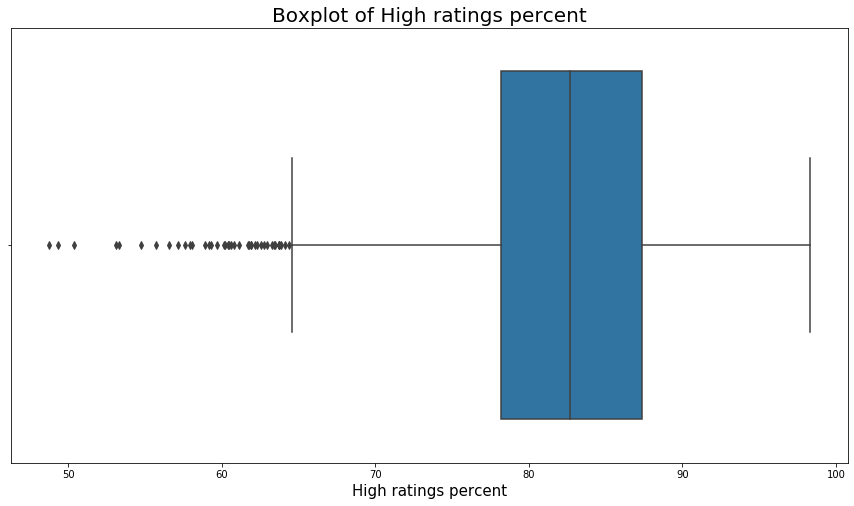

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(df['High ratings percent'])
plt.xlabel('High ratings percent',fontsize=15)
plt.title('Boxplot of High ratings percent',fontsize=20)
plt.show()

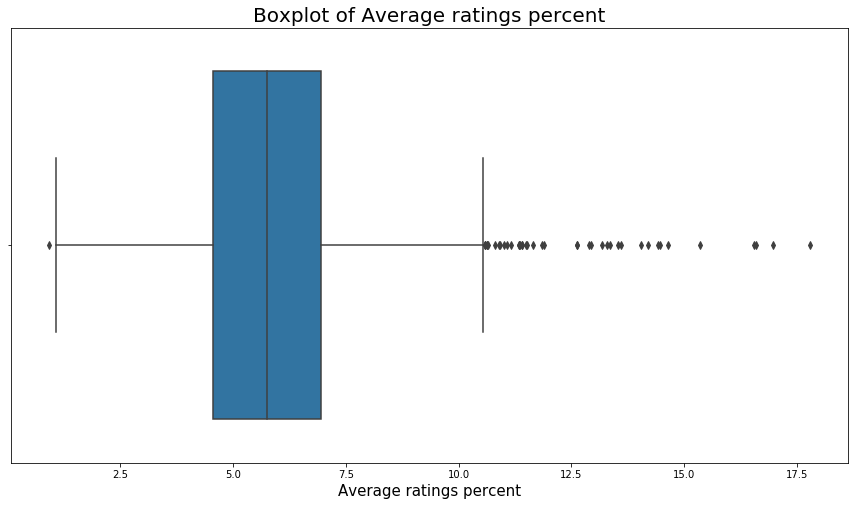

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Average ratings percent'])
plt.xlabel('Average ratings percent',fontsize=15)
plt.title('Boxplot of Average ratings percent',fontsize=20)
plt.show()

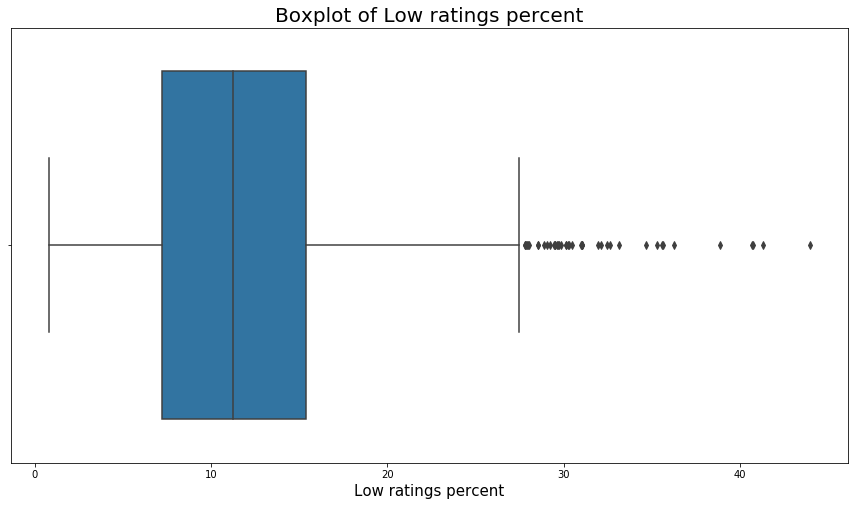

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Low ratings percent'])
plt.xlabel('Low ratings percent',fontsize=15)
plt.title('Boxplot of Low ratings percent',fontsize=20)
plt.show()

In [34]:
# Removing the outliers

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df = df[~((df < q1 - 1.5*IQR) | (df > q3 + 1.5*IQR)).any(axis=1)]

In [35]:
df.shape

(1241, 14)

In [36]:
df['installs'].value_counts()

10000000     628
5000000      206
50000000     173
1000000      140
100000000     82
500000        10
100000         2
Name: installs, dtype: int64

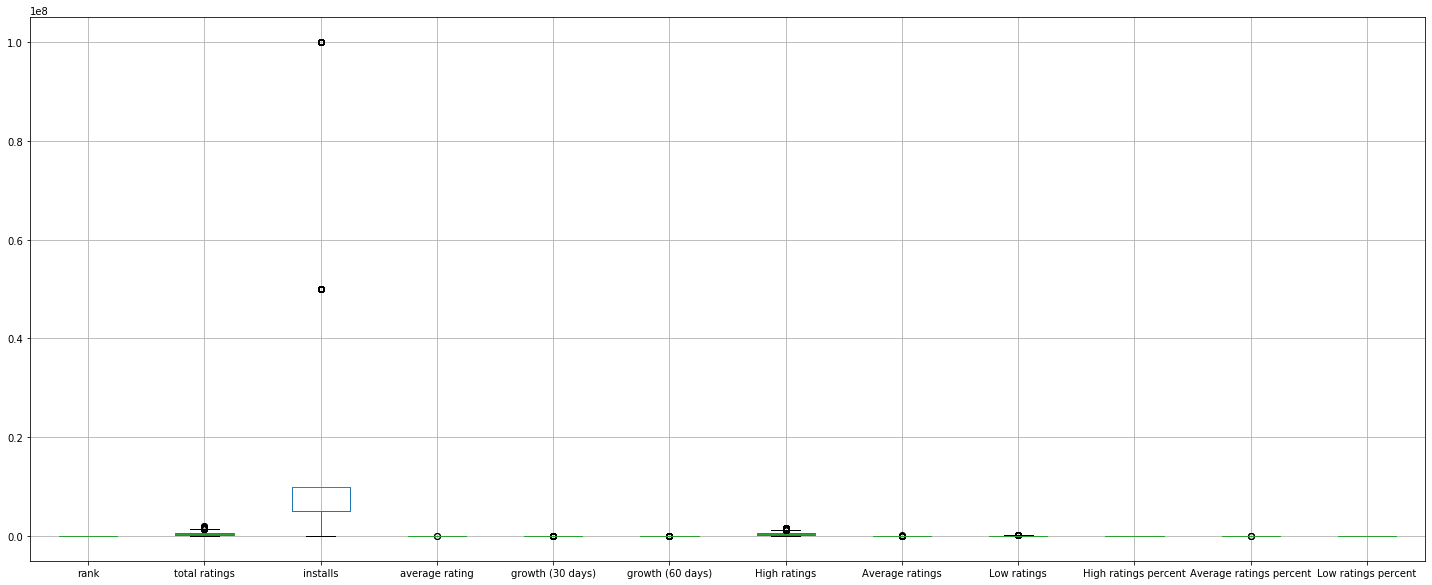

In [37]:
plt.figure(figsize=(25,10))
df.boxplot()
plt.show()

In [38]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'category', 'High ratings',
       'Average ratings', 'Low ratings', 'High ratings percent',
       'Average ratings percent', 'Low ratings percent'],
      dtype='object')

In [39]:
df_num=df.select_dtypes(include=np.number)
df_num = df_num.drop('rank',axis=1)
print(df_num.columns)

Index(['total ratings', 'installs', 'average rating', 'growth (30 days)',
       'growth (60 days)', 'High ratings', 'Average ratings', 'Low ratings',
       'High ratings percent', 'Average ratings percent',
       'Low ratings percent'],
      dtype='object')


In [40]:
df_num.shape

(1241, 11)

In [41]:
df_cat=df.select_dtypes(include=np.object)
df_cat.head()

title     category
41      DEAD TARGET: Zombie Offline - Shooting Games  GAME ACTION
48                  Zombie Catchers - love the hunt!  GAME ACTION
49                                     Into the Dead  GAME ACTION
51  Modern Strike Online: Free PvP FPS shooting game  GAME ACTION
55                                           Archero  GAME ACTION

In [42]:
df_cat.columns

Index(['title', 'category'], dtype='object')

In [43]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'category', 'High ratings',
       'Average ratings', 'Low ratings', 'High ratings percent',
       'Average ratings percent', 'Low ratings percent'],
      dtype='object')

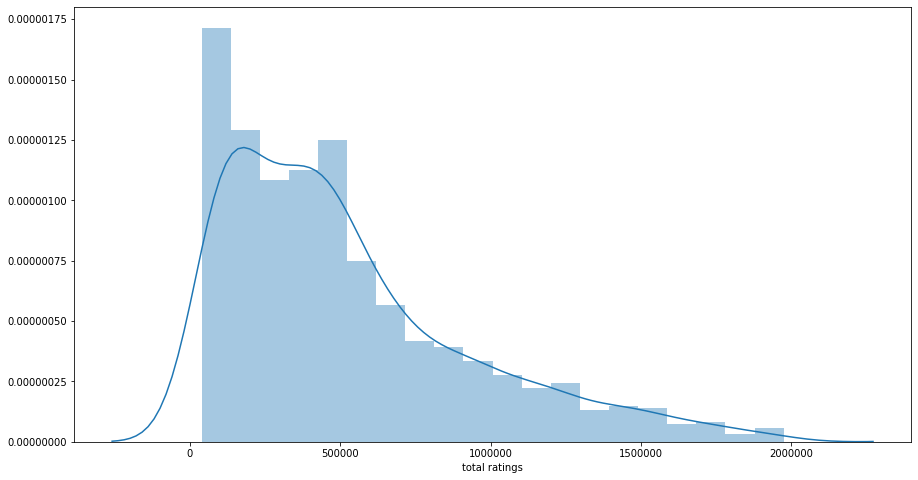

1.1800005708209644


In [44]:
# checking the distribution of the data

plt.figure(figsize=(15,8))
sns.distplot(df['total ratings'])
plt.show()
print(df['total ratings'].skew())

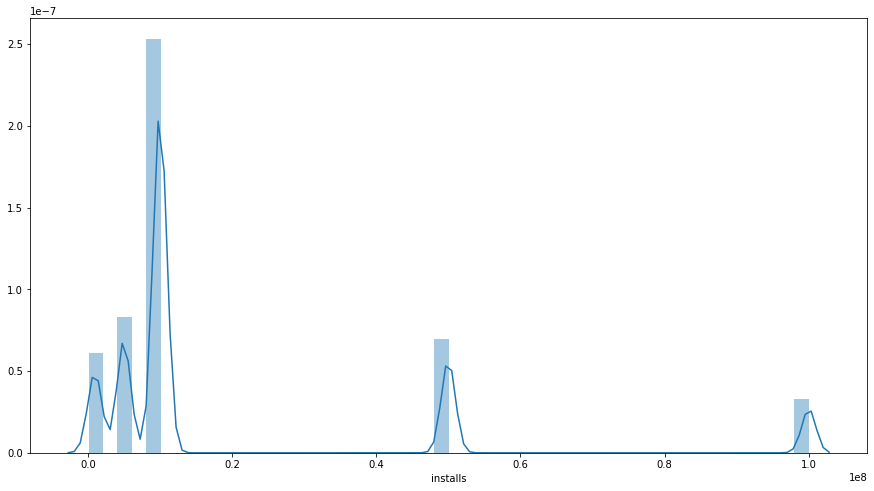

2.0600078650942293


In [45]:
plt.figure(figsize=(15,8))
sns.distplot(df['installs'])
plt.show()
print(df['installs'].skew())

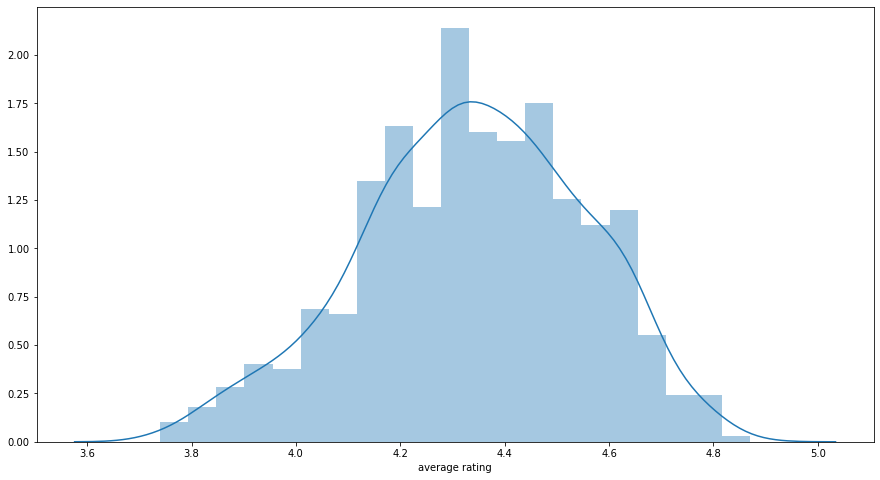

-0.22721517239819


In [46]:
plt.figure(figsize=(15,8))
sns.distplot(df['average rating'])
plt.show()
print(df['average rating'].skew())

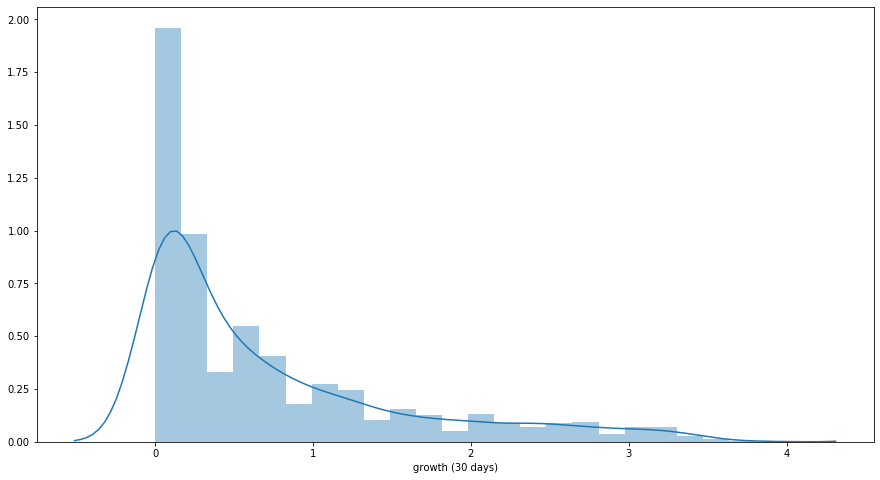

1.4688216036210702


In [47]:
plt.figure(figsize=(15,8))
sns.distplot(df['growth (30 days)'])
plt.show()
print(df['growth (30 days)'].skew())

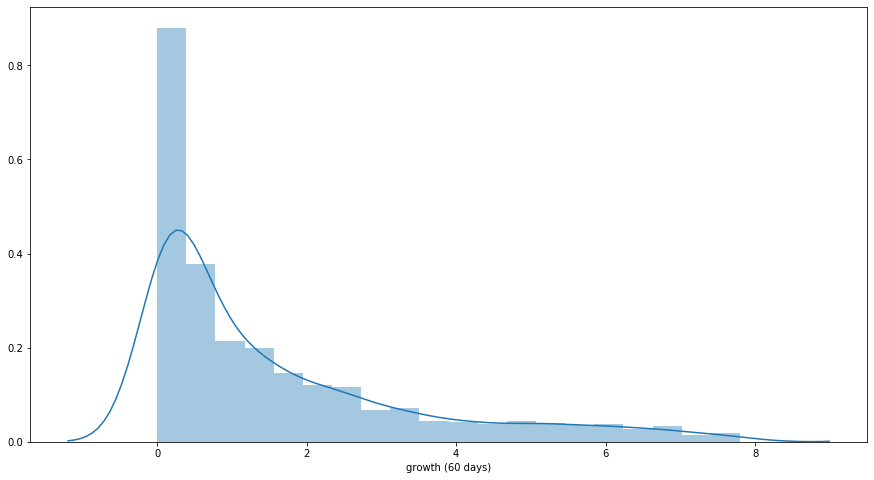

1.4900094876551249


In [48]:
plt.figure(figsize=(15,8))
sns.distplot(df['growth (60 days)'])
plt.show()
print(df['growth (60 days)'].skew())

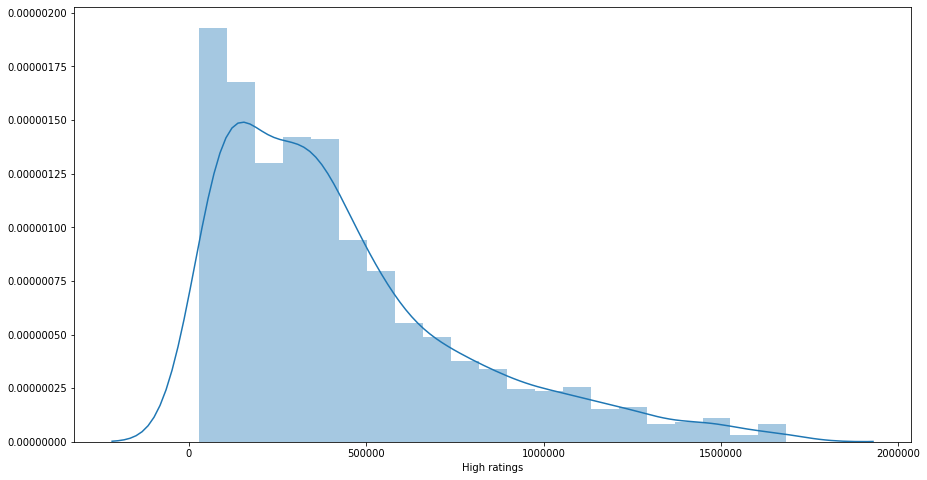

1.2645355929362654


In [49]:
plt.figure(figsize=(15,8))
sns.distplot(df['High ratings'])
plt.show()
print(df['High ratings'].skew())

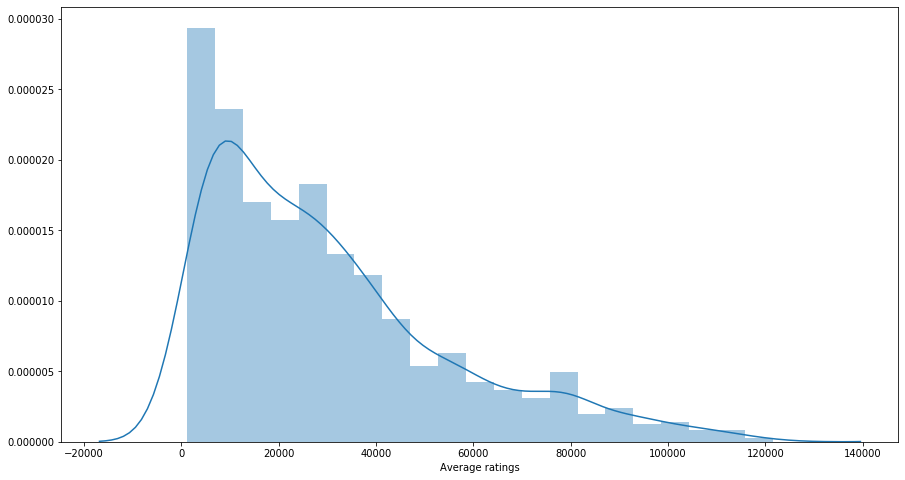

1.1502772185906371


In [50]:
plt.figure(figsize=(15,8))
sns.distplot(df['Average ratings'])
plt.show()
print(df['Average ratings'].skew())

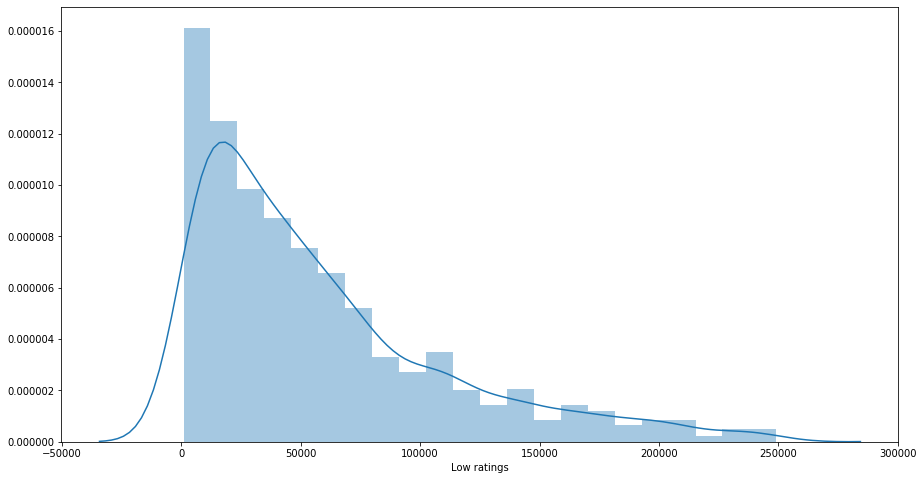

1.3654688847874559


In [51]:
plt.figure(figsize=(15,8))
sns.distplot(df['Low ratings'])
plt.show()
print(df['Low ratings'].skew())

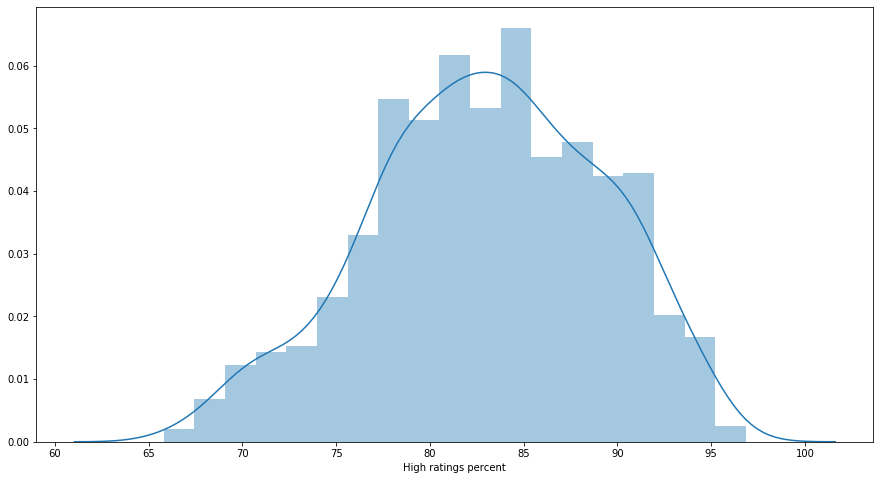

-0.2184463310783014


In [52]:
plt.figure(figsize=(15,8))
sns.distplot(df['High ratings percent'])
plt.show()
print(df['High ratings percent'].skew())

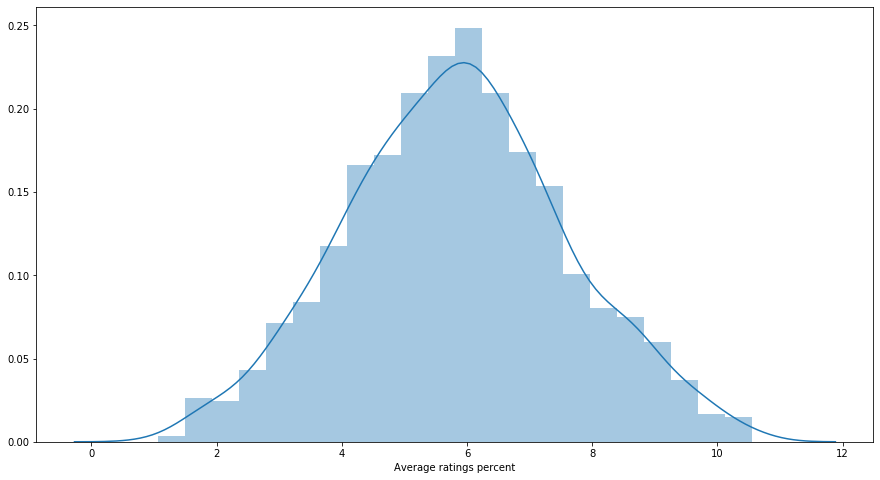

0.07116140057830875


In [53]:
plt.figure(figsize=(15,8))
sns.distplot(df['Average ratings percent'])
plt.show()
print(df['Average ratings percent'].skew())

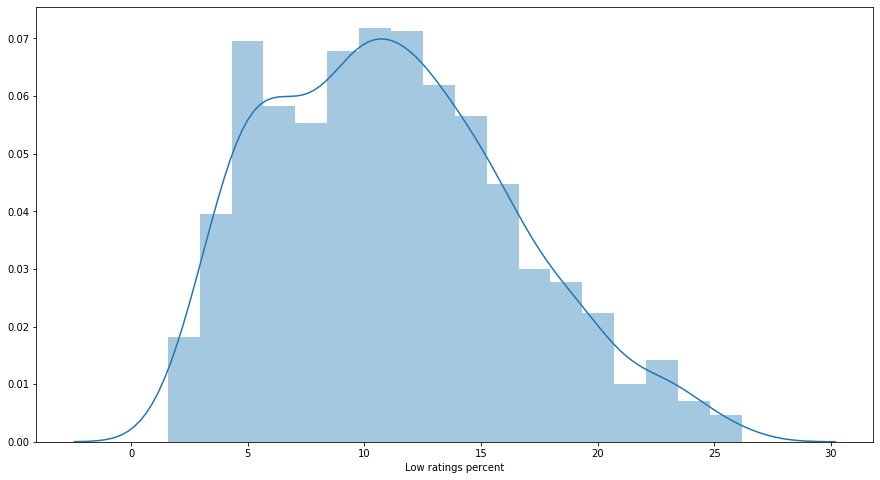

0.42984773280474164


In [54]:
plt.figure(figsize=(15,8))
sns.distplot(df['Low ratings percent'])
plt.show()
print(df['Low ratings percent'].skew())

In [55]:
# Normalizing the data 

X_norm = MinMaxScaler()

# normalize all the columns of the dataframe 'num_var'
num_norm = X_norm.fit_transform(df_num)

# create a dataframe of normalized variables
# pass the required column names to the parameter 'columns'
cl = pd.DataFrame(num_norm, columns = df_num.columns)

cl.head()

total ratings  installs  average rating  growth (30 days)  \
0       1.000000  1.000000        0.601770          0.157895   
1       0.877523  1.000000        0.619469          0.526316   
2       0.862315  0.499499        0.699115          0.052632   
3       0.807022  0.499499        0.566372          0.289474   
4       0.762440  0.499499        0.566372          0.315789   

   growth (60 days)  High ratings  Average ratings  Low ratings  \
0          0.192308      0.993308         0.910350     0.762679   
1          0.461538      0.878186         0.761830     0.647819   
2          0.051282      0.895493         0.634534     0.475444   
3          0.307692      0.791202         0.606221     0.753918   
4          0.397436      0.754560         0.714786     0.598158   

   High ratings percent  Average ratings percent  Low ratings percent  
0              0.610401                 0.479001             0.327664  
1              0.629389                 0.451225             0.314403  
2              0.730780                 0.366366             0.219156  
3              0.573868                 0.375931             0.413457  
4              0.598248                 0.494705             0.336950

In [56]:
cl.shape

(1241, 11)

In [57]:
df_cat_en=df_cat.copy()

In [58]:
df_cat_en.reset_index(drop=True,inplace=True)

In [59]:
df_final = pd.concat([df_cat_en,cl],axis=1)

In [60]:
df_final.head()

title     category  \
0      DEAD TARGET: Zombie Offline - Shooting Games  GAME ACTION   
1                  Zombie Catchers - love the hunt!  GAME ACTION   
2                                     Into the Dead  GAME ACTION   
3  Modern Strike Online: Free PvP FPS shooting game  GAME ACTION   
4                                           Archero  GAME ACTION   

   total ratings  installs  average rating  growth (30 days)  \
0       1.000000  1.000000        0.601770          0.157895   
1       0.877523  1.000000        0.619469          0.526316   
2       0.862315  0.499499        0.699115          0.052632   
3       0.807022  0.499499        0.566372          0.289474   
4       0.762440  0.499499        0.566372          0.315789   

   growth (60 days)  High ratings  Average ratings  Low ratings  \
0          0.192308      0.993308         0.910350     0.762679   
1          0.461538      0.878186         0.761830     0.647819   
2          0.051282      0.895493         0.634534     0.475444   
3          0.307692      0.791202         0.606221     0.753918   
4          0.397436      0.754560         0.714786     0.598158   

   High ratings percent  Average ratings percent  Low ratings percent  
0              0.610401                 0.479001             0.327664  
1              0.629389                 0.451225             0.314403  
2              0.730780                 0.366366             0.219156  
3              0.573868                 0.375931             0.413457  
4              0.598248                 0.494705             0.336950

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Hierarchical Clustering
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [62]:
mergings = linkage(cl[['total ratings','Low ratings percent']], method = 'ward', metric = 'euclidean')

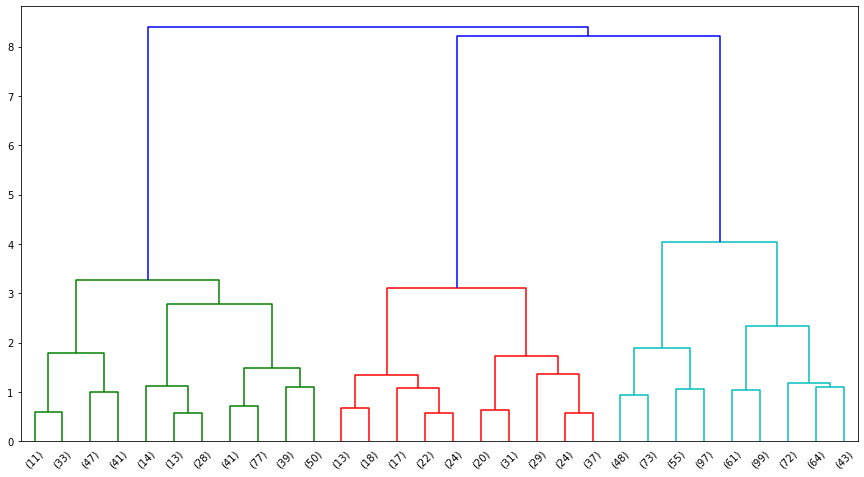

In [63]:
dendrogram(mergings,truncate_mode = 'lastp')
plt.show()

### 2 Cluster Solution

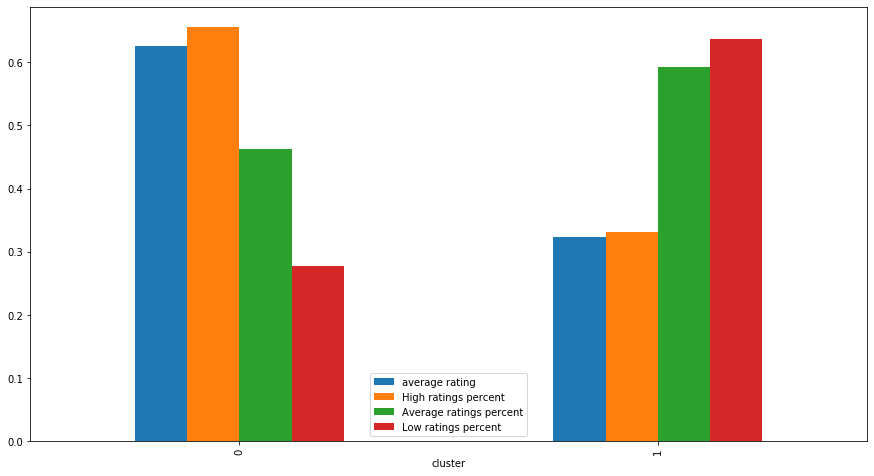

In [64]:
cluster_cut = pd.Series((cut_tree(mergings,n_clusters=2)).reshape(-1,))
cluster_cut.value_counts()

cl_final = cl.copy()
cl['cluster'] = cluster_cut

cl[['cluster','average rating','High ratings percent','Average ratings percent','Low ratings percent']].groupby('cluster').agg('mean').plot.bar()
plt.show()

In [65]:
df_final['cluster'] = cluster_cut

In [66]:
df_grp = df_final.groupby('cluster')
df_grp[['average rating','High ratings percent','Average ratings percent','Low ratings percent']].mean()

average rating  High ratings percent  Average ratings percent  \
cluster                                                                  
0              0.625508              0.655061                 0.462106   
1              0.322582              0.331485                 0.591589   

         Low ratings percent  
cluster                       
0                   0.277821  
1                   0.636225

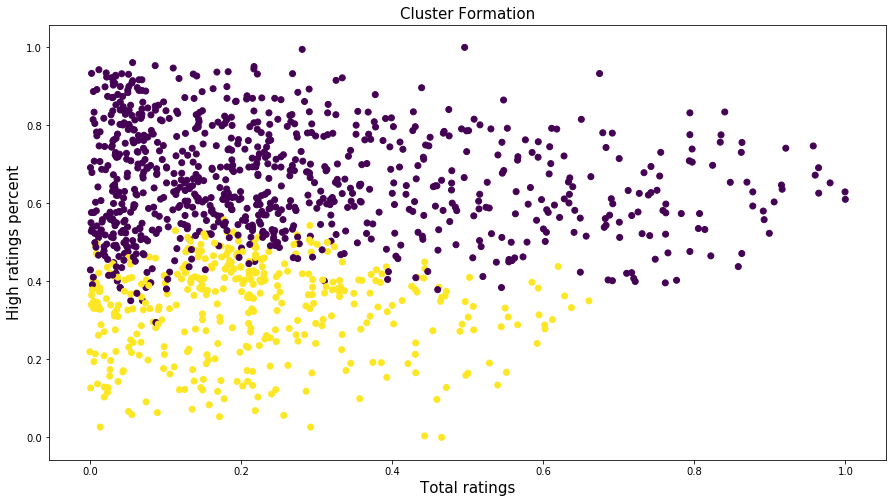

In [67]:
plt.scatter(df_final['total ratings'],df_final['High ratings percent'],c=df_final['cluster'])
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('High ratings percent',fontsize=15)
plt.title('Cluster Formation',fontsize=15)
plt.show()

### 3 Cluster Solution

In [68]:
cluster_cut = pd.Series((cut_tree(mergings,n_clusters=3)).reshape(-1,))
cluster_cut.value_counts()

2    612
1    394
0    235
dtype: int64

In [69]:
cl_final = cl.copy()
cl['cluster'] = cluster_cut

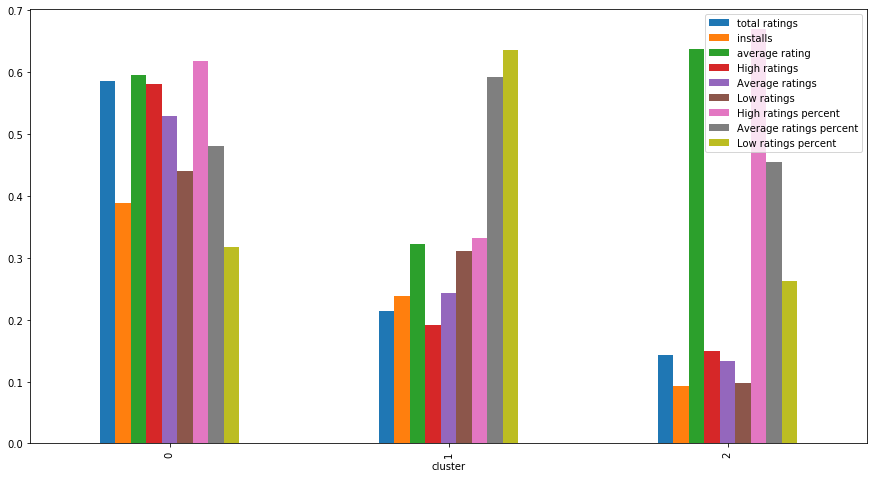

In [70]:
cl[['cluster','total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].groupby('cluster').agg('mean').plot.bar()
plt.show()

In [71]:
df_final['cluster'] = cluster_cut

In [72]:
df_grp = df_final.groupby('cluster')
df_grp[['cluster','total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].mean()

cluster  total ratings  installs  average rating  High ratings  \
cluster                                                                   
0              0       0.585630  0.388112        0.595293      0.580012   
1              1       0.214404  0.238045        0.322582      0.191617   
2              2       0.143063  0.093230        0.637110      0.149976   

         Average ratings  Low ratings  High ratings percent  \
cluster                                                       
0               0.528996     0.439828              0.618095   
1               0.242772     0.311465              0.331485   
2               0.132642     0.096838              0.669255   

         Average ratings percent  Low ratings percent  
cluster                                                
0                       0.479853             0.317628  
1                       0.591589             0.636225  
2                       0.455292             0.262536

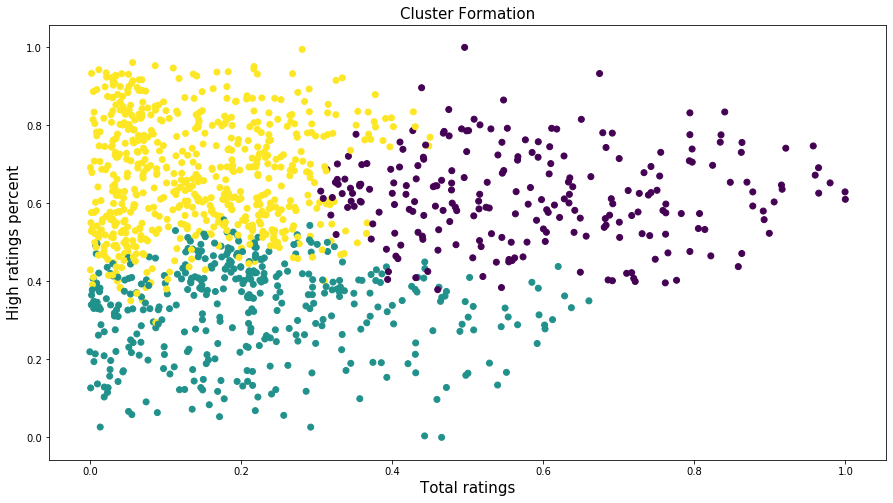

In [73]:
plt.scatter(df_final['total ratings'],df_final['High ratings percent'],c=df_final['cluster'])
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('High ratings percent',fontsize=15)
plt.title('Cluster Formation',fontsize=15)
plt.show()

### 4 Cluster Solution

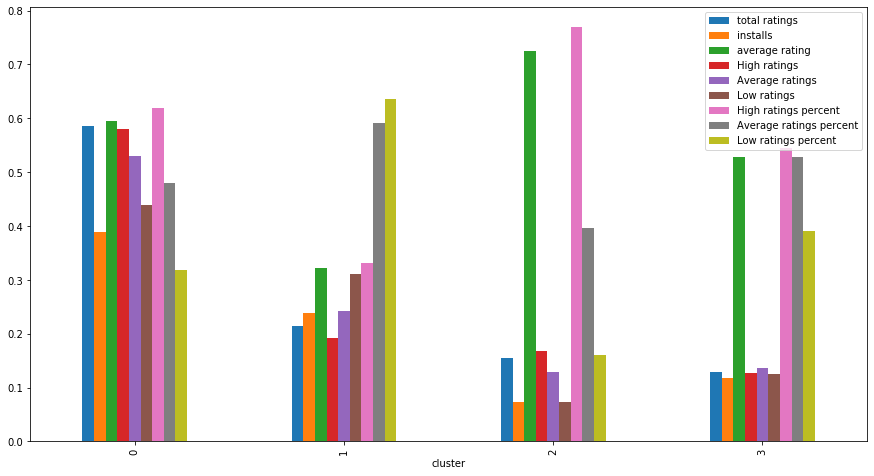

In [74]:
cluster_cut = pd.Series((cut_tree(mergings,n_clusters=4)).reshape(-1,))
cluster_cut.value_counts()

cl_final = cl.copy()
cl['cluster'] = cluster_cut

cl[['cluster','total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].groupby('cluster').agg('mean').plot.bar()
plt.show()

In [75]:
df_final['cluster'] = cluster_cut

In [76]:
df_grp = df_final.groupby('cluster')
df_grp[['total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].mean()

total ratings  installs  average rating  High ratings  \
cluster                                                          
0             0.585630  0.388112        0.595293      0.580012   
1             0.214404  0.238045        0.322582      0.191617   
2             0.154184  0.073608        0.725664      0.167919   
3             0.129254  0.117597        0.527148      0.127697   

         Average ratings  Low ratings  High ratings percent  \
cluster                                                       
0               0.528996     0.439828              0.618095   
1               0.242772     0.311465              0.331485   
2               0.129681     0.074121              0.768925   
3               0.136318     0.125047              0.545489   

         Average ratings percent  Low ratings percent  
cluster                                                
0                       0.479853             0.317628  
1                       0.591589             0.636225  
2                       0.396180             0.159543  
3                       0.528694             0.390428

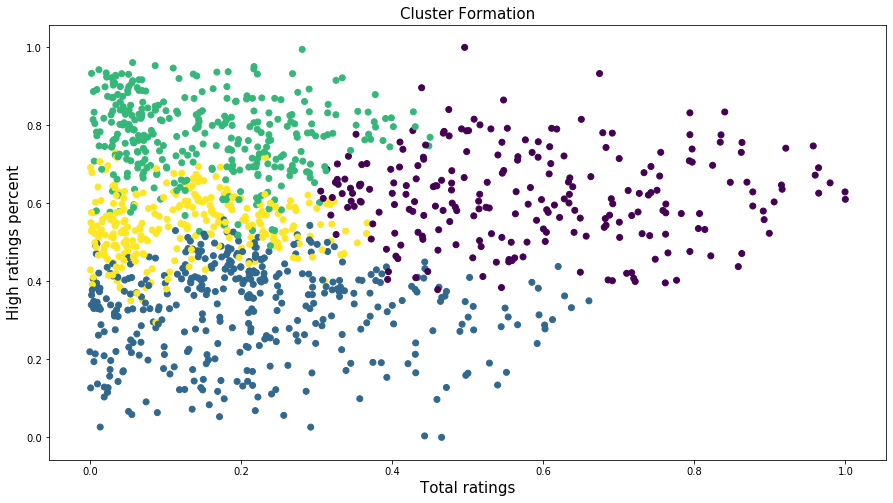

In [77]:
plt.scatter(df_final['total ratings'],df_final['High ratings percent'],c=df_final['cluster'])
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('High ratings percent',fontsize=15)
plt.title('Cluster Formation',fontsize=15)
plt.show()

### 5 Cluster Solution

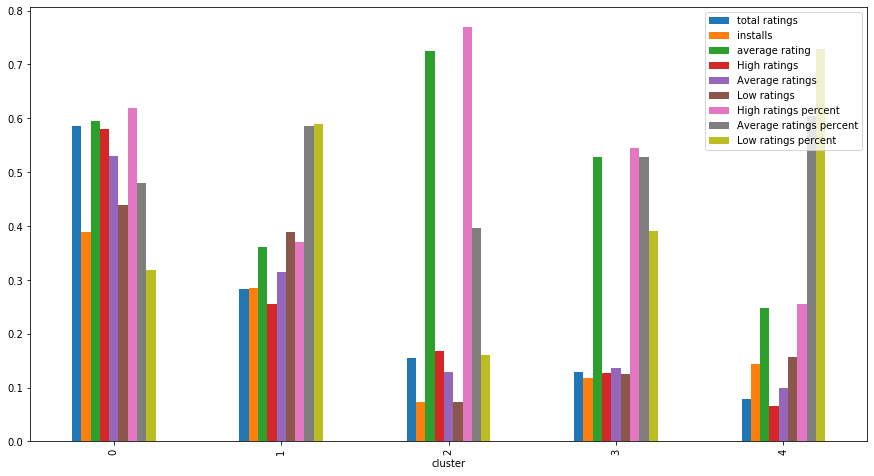

In [78]:
cluster_cut = pd.Series((cut_tree(mergings,n_clusters=5)).reshape(-1,))
cluster_cut.value_counts()

cl_final = cl.copy()
cl['cluster'] = cluster_cut

cl[['cluster','total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].groupby('cluster').agg('mean').plot.bar()
plt.show()

In [79]:
df_final['cluster'] = cluster_cut

In [80]:
df_grp = df_final.groupby('cluster')
df_grp[['total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].mean()

total ratings  installs  average rating  High ratings  \
cluster                                                          
0             0.585630  0.388112        0.595293      0.580012   
1             0.282743  0.285354        0.360062      0.254659   
2             0.154184  0.073608        0.725664      0.167919   
3             0.129254  0.117597        0.527148      0.127697   
4             0.078762  0.144144        0.248190      0.066490   

         Average ratings  Low ratings  High ratings percent  \
cluster                                                       
0               0.528996     0.439828              0.618095   
1               0.314987     0.389460              0.370238   
2               0.129681     0.074121              0.768925   
3               0.136318     0.125047              0.545489   
4               0.099438     0.156656              0.254566   

         Average ratings percent  Low ratings percent  
cluster                                                
0                       0.479853             0.317628  
1                       0.585567             0.589648  
2                       0.396180             0.159543  
3                       0.528694             0.390428  
4                       0.603544             0.728674

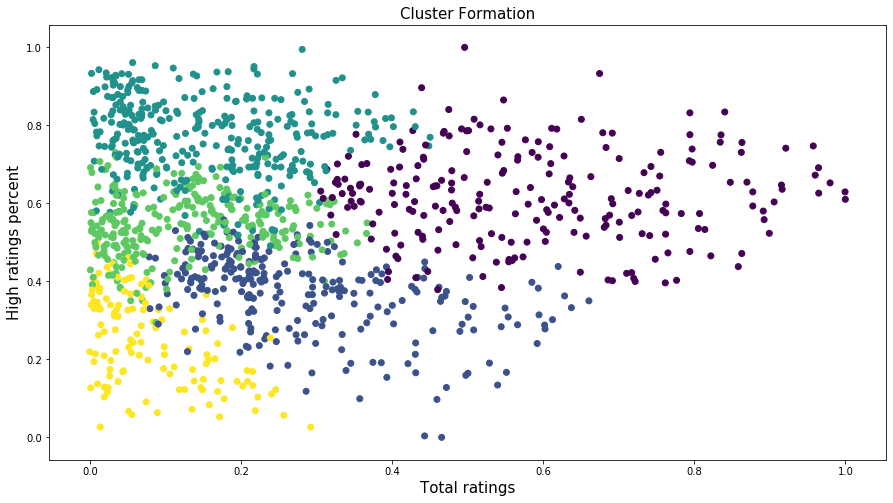

In [81]:
plt.scatter(df_final['total ratings'],df_final['High ratings percent'],c=df_final['cluster'])
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('High ratings percent',fontsize=15)
plt.title('Cluster Formation',fontsize=15)
plt.show()

### 6 Cluster Solution

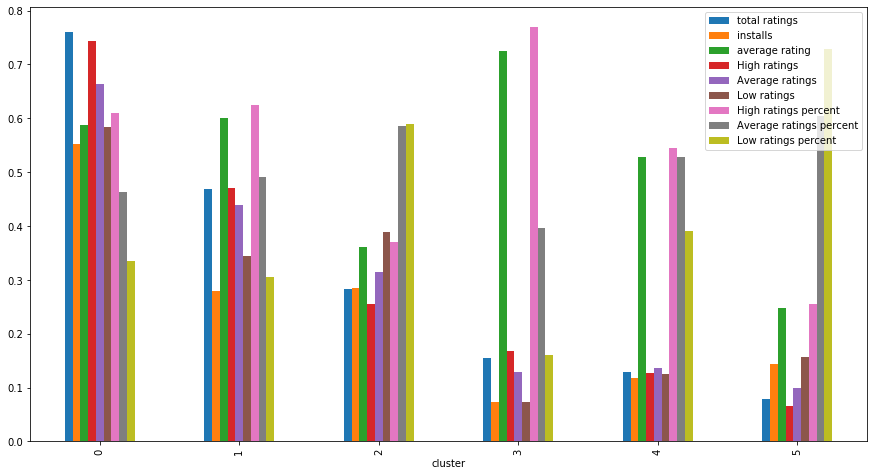

In [82]:
cluster_cut = pd.Series((cut_tree(mergings,n_clusters=6)).reshape(-1,))
cluster_cut.value_counts()

cl_final = cl.copy()
cl['cluster'] = cluster_cut

cl[['cluster','total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].groupby('cluster').agg('mean').plot.bar()
plt.show()

In [83]:
df_final['cluster'] = cluster_cut

In [84]:
df_grp = df_final.groupby('cluster')
df_grp[['total ratings','installs','average rating','High ratings','Average ratings','Low ratings','High ratings percent','Average ratings percent','Low ratings percent']].mean()

total ratings  installs  average rating  High ratings  \
cluster                                                          
0             0.759741  0.551679        0.588307      0.744325   
1             0.469555  0.279066        0.599950      0.470470   
2             0.282743  0.285354        0.360062      0.254659   
3             0.154184  0.073608        0.725664      0.167919   
4             0.129254  0.117597        0.527148      0.127697   
5             0.078762  0.144144        0.248190      0.066490   

         Average ratings  Low ratings  High ratings percent  \
cluster                                                       
0               0.663214     0.584419              0.609245   
1               0.439518     0.343434              0.623995   
2               0.314987     0.389460              0.370238   
3               0.129681     0.074121              0.768925   
4               0.136318     0.125047              0.545489   
5               0.099438     0.156656              0.254566   

         Average ratings percent  Low ratings percent  
cluster                                                
0                       0.462815             0.335356  
1                       0.491212             0.305809  
2                       0.585567             0.589648  
3                       0.396180             0.159543  
4                       0.528694             0.390428  
5                       0.603544             0.728674

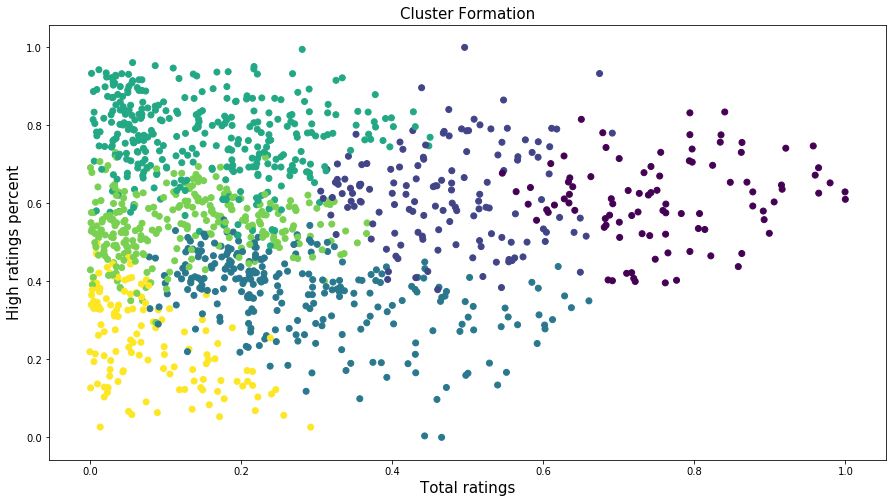

In [85]:
plt.scatter(df_final['total ratings'],df_final['High ratings percent'],c=df_final['cluster'])
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('High ratings percent',fontsize=15)
plt.title('Cluster Formation',fontsize=15)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>K-Means Clustering
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
from sklearn.cluster import KMeans

In [87]:
ssd=[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(cl[['total ratings','High ratings percent']])
    ssd.append(kmeans.inertia_)

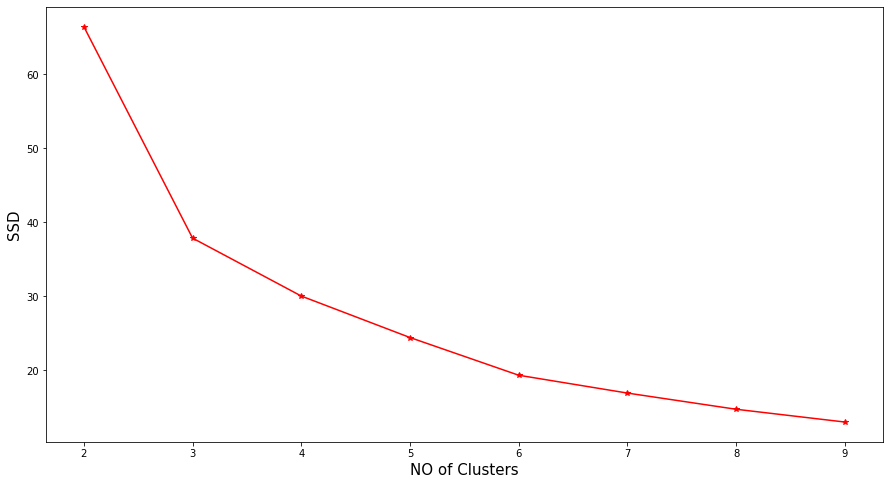

In [88]:
plt.plot(range(2,10),ssd,marker='*',c='red')
plt.xlabel('NO of Clusters',fontsize = '15')
plt.ylabel('SSD',fontsize = '15')
plt.show()

In [89]:
score=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(cl[['total ratings','High ratings percent']])
    ss=silhouette_score(cl,kmeans.labels_)
    score.append(ss)

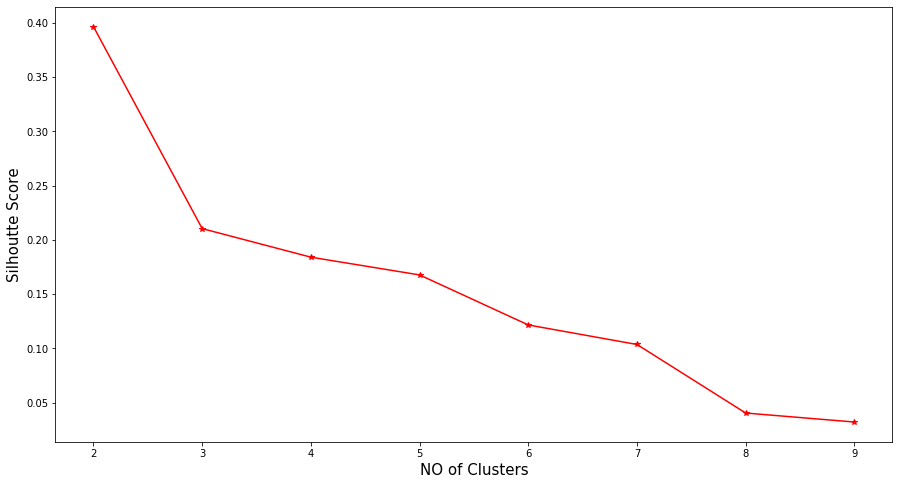

In [90]:
plt.plot(range(2,10),score,color='r',marker='*')
plt.xlabel('NO of Clusters',fontsize = '15')
plt.ylabel('Silhoutte Score',fontsize = '15')
plt.show()

In [91]:
import plusmodules as pms

### K-Means 2 Cluster Solution

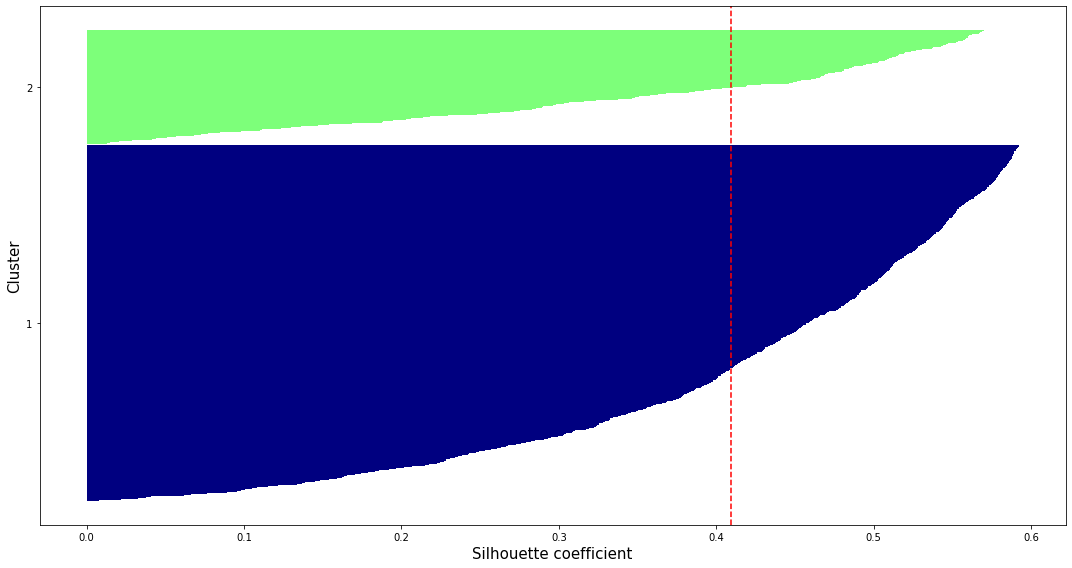

In [92]:
pms.svisualizer(cl[['total ratings','High ratings percent']],2)

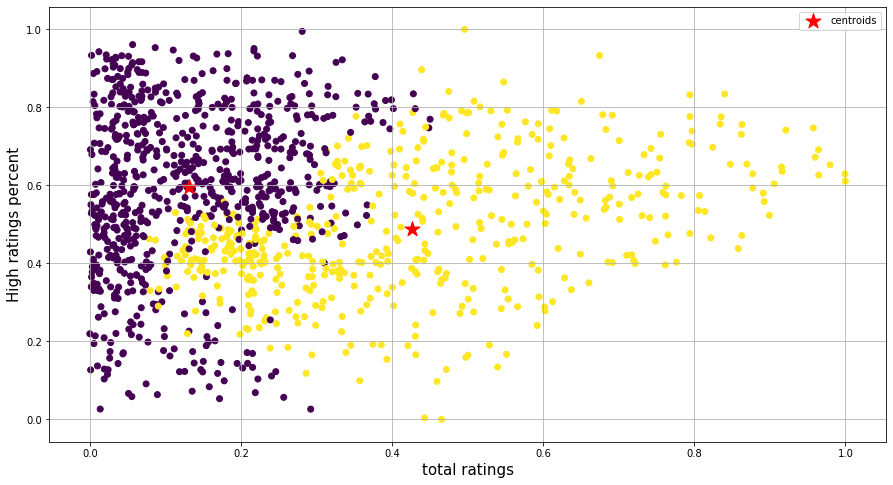

In [93]:
pms.cluster_plot_2(cl,2)

### K-Means 3 Cluster Solution

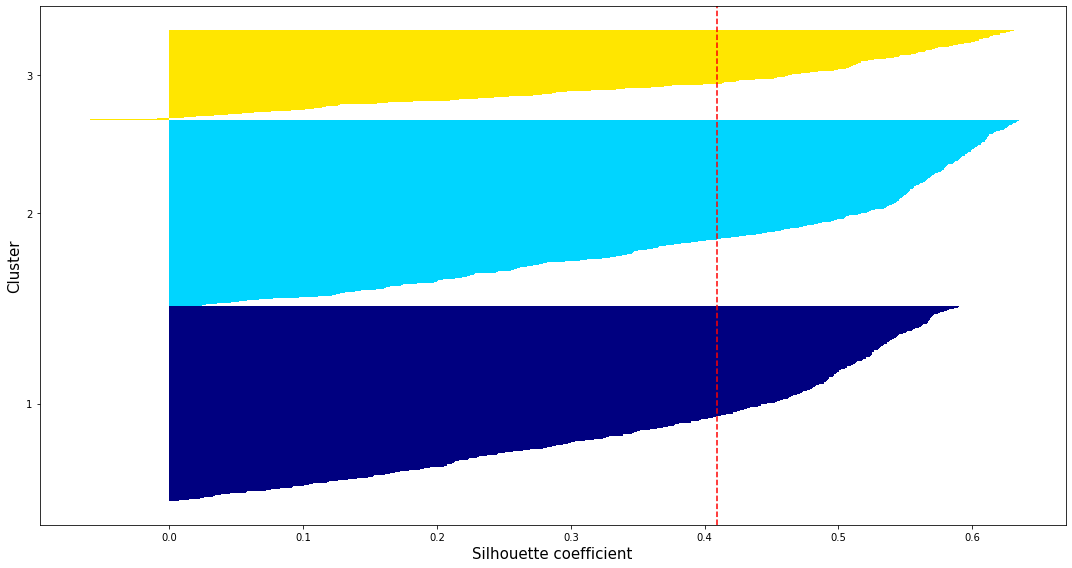

In [94]:
pms.svisualizer(cl[['total ratings','High ratings percent']],3)

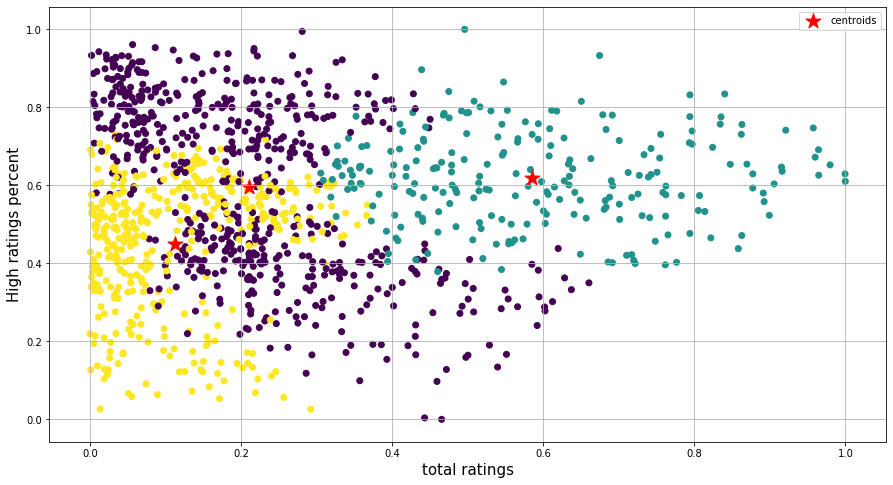

In [95]:
pms.cluster_plot_2(cl,3)

### K-Means 4 Cluster Solution

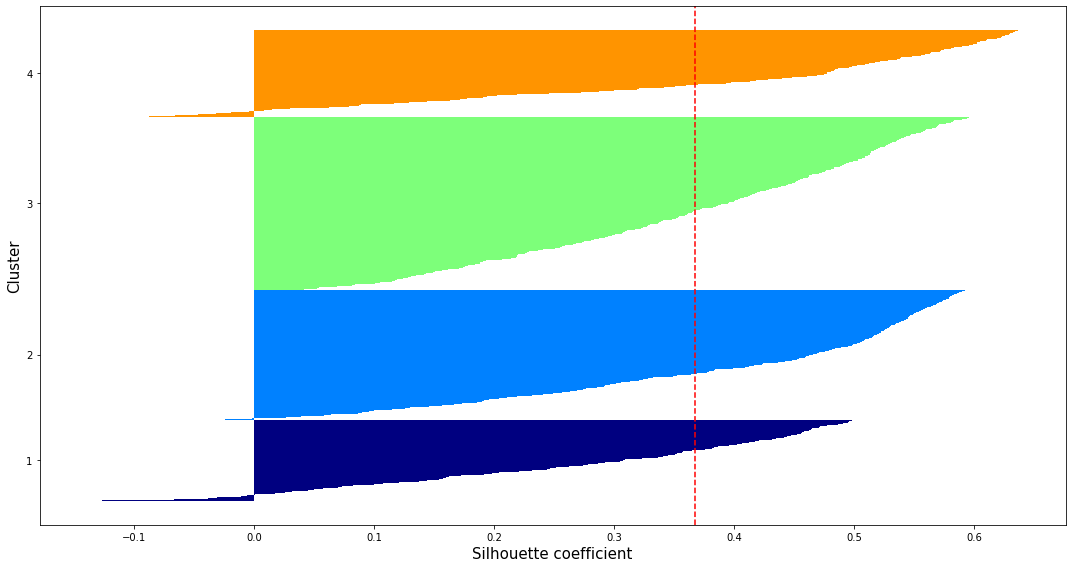

In [96]:
pms.svisualizer(cl[['total ratings','High ratings percent']],4)

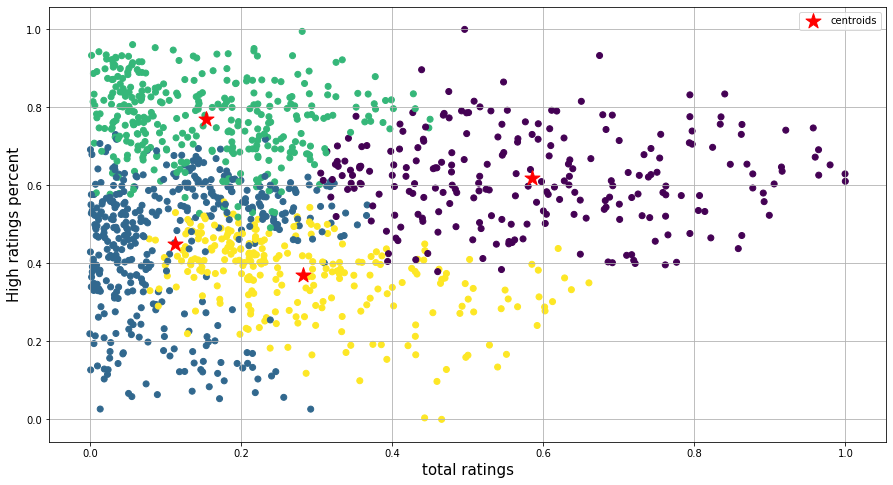

In [97]:
pms.cluster_plot_2(cl,4)

### K-Means 5 Cluster Solution

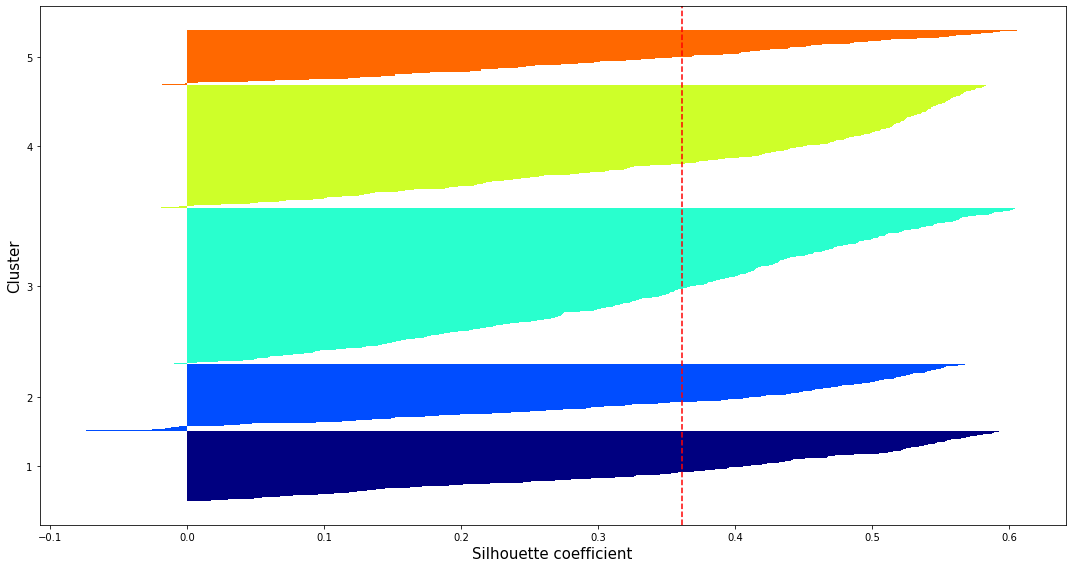

In [98]:
pms.svisualizer(cl[['total ratings','High ratings percent']],5)

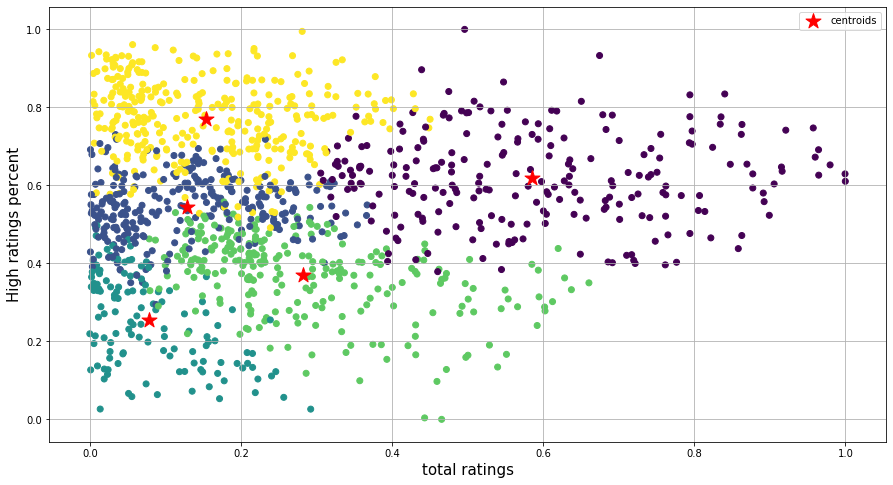

In [99]:
pms.cluster_plot_2(cl,5)

### K-Means 6 Cluster Solution

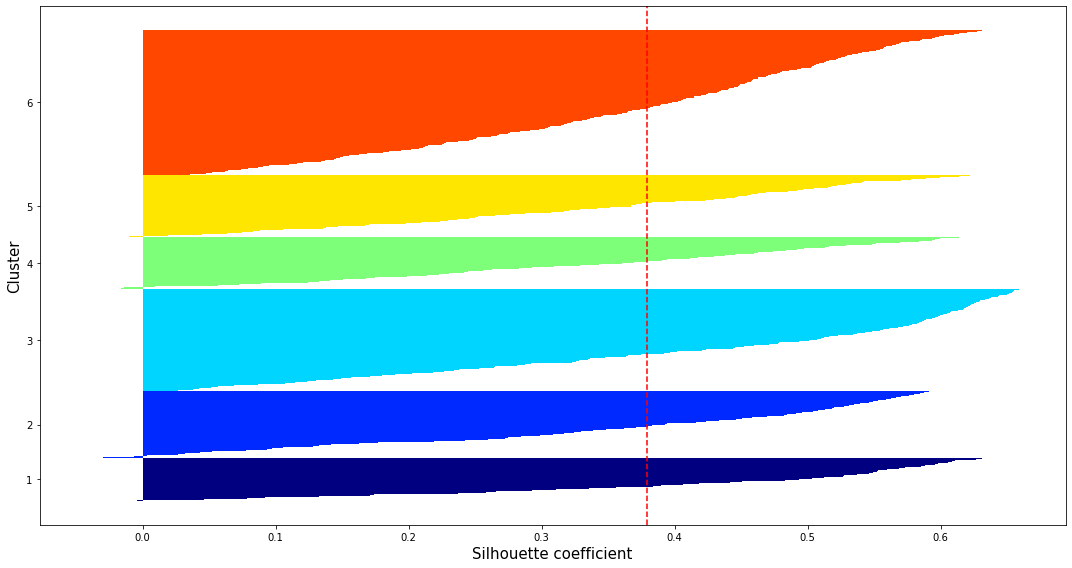

In [100]:
pms.svisualizer(cl[['total ratings','High ratings percent']],6)

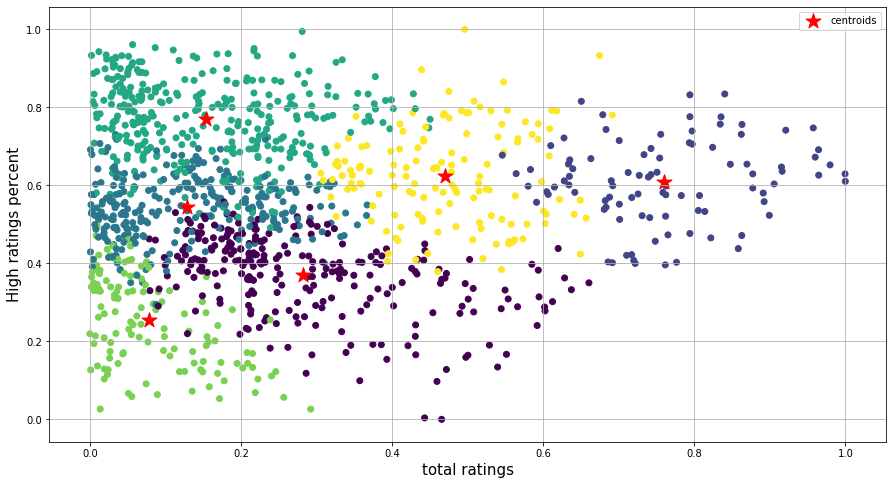

In [101]:
pms.cluster_plot_2(cl,6)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>DBSCAN 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
df_outliers = pd.read_csv("android-games.csv")
df_outliers.head(2)

rank                         title  total ratings installs  average rating  \
0     1  Garena Free Fire - The Cobra       80678661  500.0 M            4.33   
1     2   PUBG MOBILE: Graffiti Prank       35971961  100.0 M            4.24   

   growth (30 days)  growth (60 days)  price     category  5 star ratings  \
0               2.9               7.9    0.0  GAME ACTION        61935712   
1               2.0               3.1    0.0  GAME ACTION        26670566   

   4 star ratings  3 star ratings  2 star ratings  1 star ratings   paid  
0         4478738         2795172         1814999         9654037  False  
1         2109631         1352610          893674         4945478  False

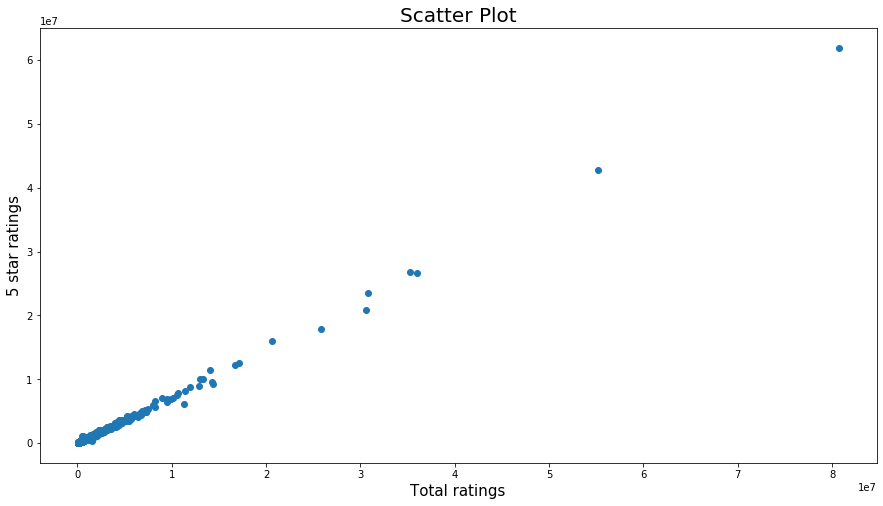

In [103]:
plt.scatter(df_outliers['total ratings'],df_outliers['5 star ratings'])
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('5 star ratings',fontsize=15)
plt.title('Scatter Plot',fontsize=20)
plt.show()

In [104]:
df_num = df_outliers[['total ratings','5 star ratings']]

In [105]:
df_num.head()

total ratings  5 star ratings
0       80678661        61935712
1       35971961        26670566
2       25836869        17850942
3       17181659        12493668
4       14237554         9657878

In [106]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cls = ss.fit_transform(df_num)

In [107]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7,min_samples=4)

In [108]:
dbscan.fit(cls)

DBSCAN(eps=0.7, min_samples=4)

In [109]:
pd.Series(dbscan.labels_).value_counts()

 0    1720
-1      10
dtype: int64

In [110]:
lbl = pd.Series(dbscan.labels_)

In [111]:
lbl.loc[lbl>0]=0

In [112]:
lbl.value_counts()

 0    1720
-1      10
dtype: int64

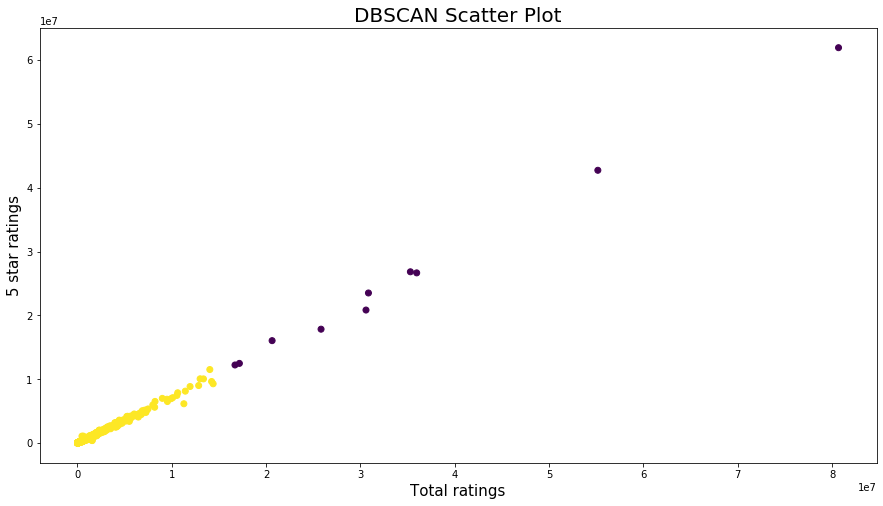

In [113]:
plt.scatter(df_outliers['total ratings'],df_outliers['5 star ratings'],c=lbl)
plt.xlabel('Total ratings',fontsize=15)
plt.ylabel('5 star ratings',fontsize=15)
plt.title('DBSCAN Scatter Plot',fontsize=20)
plt.show()

In [114]:
num2 = []
for i in df_outliers['installs']:
    if i.split(' ')[1] == 'M':
        num2.append(int(i.split('.')[0]) * 1000000)
    else:
        num2.append(int(i.split('.')[0]) * 1000)

In [115]:
df_outliers['installs'] = num2

In [116]:
df_num_2 = df_outliers[['installs','total ratings']]

In [117]:
df_num_2.head()

installs  total ratings
0  500000000       80678661
1  100000000       35971961
2  100000000       25836869
3  100000000       17181659
4  100000000       14237554

In [118]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cls2 = ss.fit_transform(df_num_2)

In [119]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=4)

In [120]:
dbscan.fit(cls2)

DBSCAN(min_samples=4)

In [121]:
pd.Series(dbscan.labels_).value_counts()

 2    1249
 1     266
 0     198
-1      17
dtype: int64

In [122]:
lbl = pd.Series(dbscan.labels_)

In [123]:
lbl.loc[lbl>0]=0

In [124]:
lbl.value_counts()

 0    1713
-1      17
dtype: int64

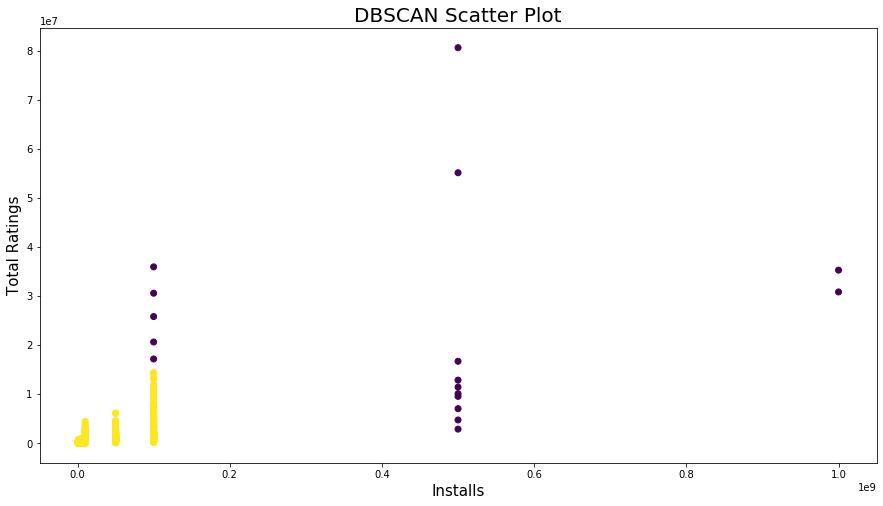

In [125]:
plt.scatter(df_outliers['installs'],df_outliers['total ratings'],c=lbl)
plt.xlabel('Installs',fontsize=15)
plt.ylabel('Total Ratings',fontsize=15)
plt.title('DBSCAN Scatter Plot',fontsize=20)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Principal Components Analysis
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [126]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1241 non-null   object 
 1   category                 1241 non-null   object 
 2   total ratings            1241 non-null   float64
 3   installs                 1241 non-null   float64
 4   average rating           1241 non-null   float64
 5   growth (30 days)         1241 non-null   float64
 6   growth (60 days)         1241 non-null   float64
 7   High ratings             1241 non-null   float64
 8   Average ratings          1241 non-null   float64
 9   Low ratings              1241 non-null   float64
 10  High ratings percent     1241 non-null   float64
 11  Average ratings percent  1241 non-null   float64
 12  Low ratings percent      1241 non-null   float64
 13  cluster                  1241 non-null   int32  
dtypes: float64(11), int32(1)

In [127]:
df_x = df_final.drop('cluster',axis=1)
df_y = df_final['cluster']

In [128]:
df_final['cluster'].value_counts()

3    339
4    273
2    262
1    141
5    132
0     94
Name: cluster, dtype: int64

In [129]:
df_x.head()

title     category  \
0      DEAD TARGET: Zombie Offline - Shooting Games  GAME ACTION   
1                  Zombie Catchers - love the hunt!  GAME ACTION   
2                                     Into the Dead  GAME ACTION   
3  Modern Strike Online: Free PvP FPS shooting game  GAME ACTION   
4                                           Archero  GAME ACTION   

   total ratings  installs  average rating  growth (30 days)  \
0       1.000000  1.000000        0.601770          0.157895   
1       0.877523  1.000000        0.619469          0.526316   
2       0.862315  0.499499        0.699115          0.052632   
3       0.807022  0.499499        0.566372          0.289474   
4       0.762440  0.499499        0.566372          0.315789   

   growth (60 days)  High ratings  Average ratings  Low ratings  \
0          0.192308      0.993308         0.910350     0.762679   
1          0.461538      0.878186         0.761830     0.647819   
2          0.051282      0.895493         0.634534     0.475444   
3          0.307692      0.791202         0.606221     0.753918   
4          0.397436      0.754560         0.714786     0.598158   

   High ratings percent  Average ratings percent  Low ratings percent  
0              0.610401                 0.479001             0.327664  
1              0.629389                 0.451225             0.314403  
2              0.730780                 0.366366             0.219156  
3              0.573868                 0.375931             0.413457  
4              0.598248                 0.494705             0.336950

In [130]:
df_num = df_x.select_dtypes(include=np.number)
df_num.head()

total ratings  installs  average rating  growth (30 days)  \
0       1.000000  1.000000        0.601770          0.157895   
1       0.877523  1.000000        0.619469          0.526316   
2       0.862315  0.499499        0.699115          0.052632   
3       0.807022  0.499499        0.566372          0.289474   
4       0.762440  0.499499        0.566372          0.315789   

   growth (60 days)  High ratings  Average ratings  Low ratings  \
0          0.192308      0.993308         0.910350     0.762679   
1          0.461538      0.878186         0.761830     0.647819   
2          0.051282      0.895493         0.634534     0.475444   
3          0.307692      0.791202         0.606221     0.753918   
4          0.397436      0.754560         0.714786     0.598158   

   High ratings percent  Average ratings percent  Low ratings percent  
0              0.610401                 0.479001             0.327664  
1              0.629389                 0.451225             0.314403  
2              0.730780                 0.366366             0.219156  
3              0.573868                 0.375931             0.413457  
4              0.598248                 0.494705             0.336950

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_num, df_y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(868, 11)
(373, 11)
(373,)
(868,)


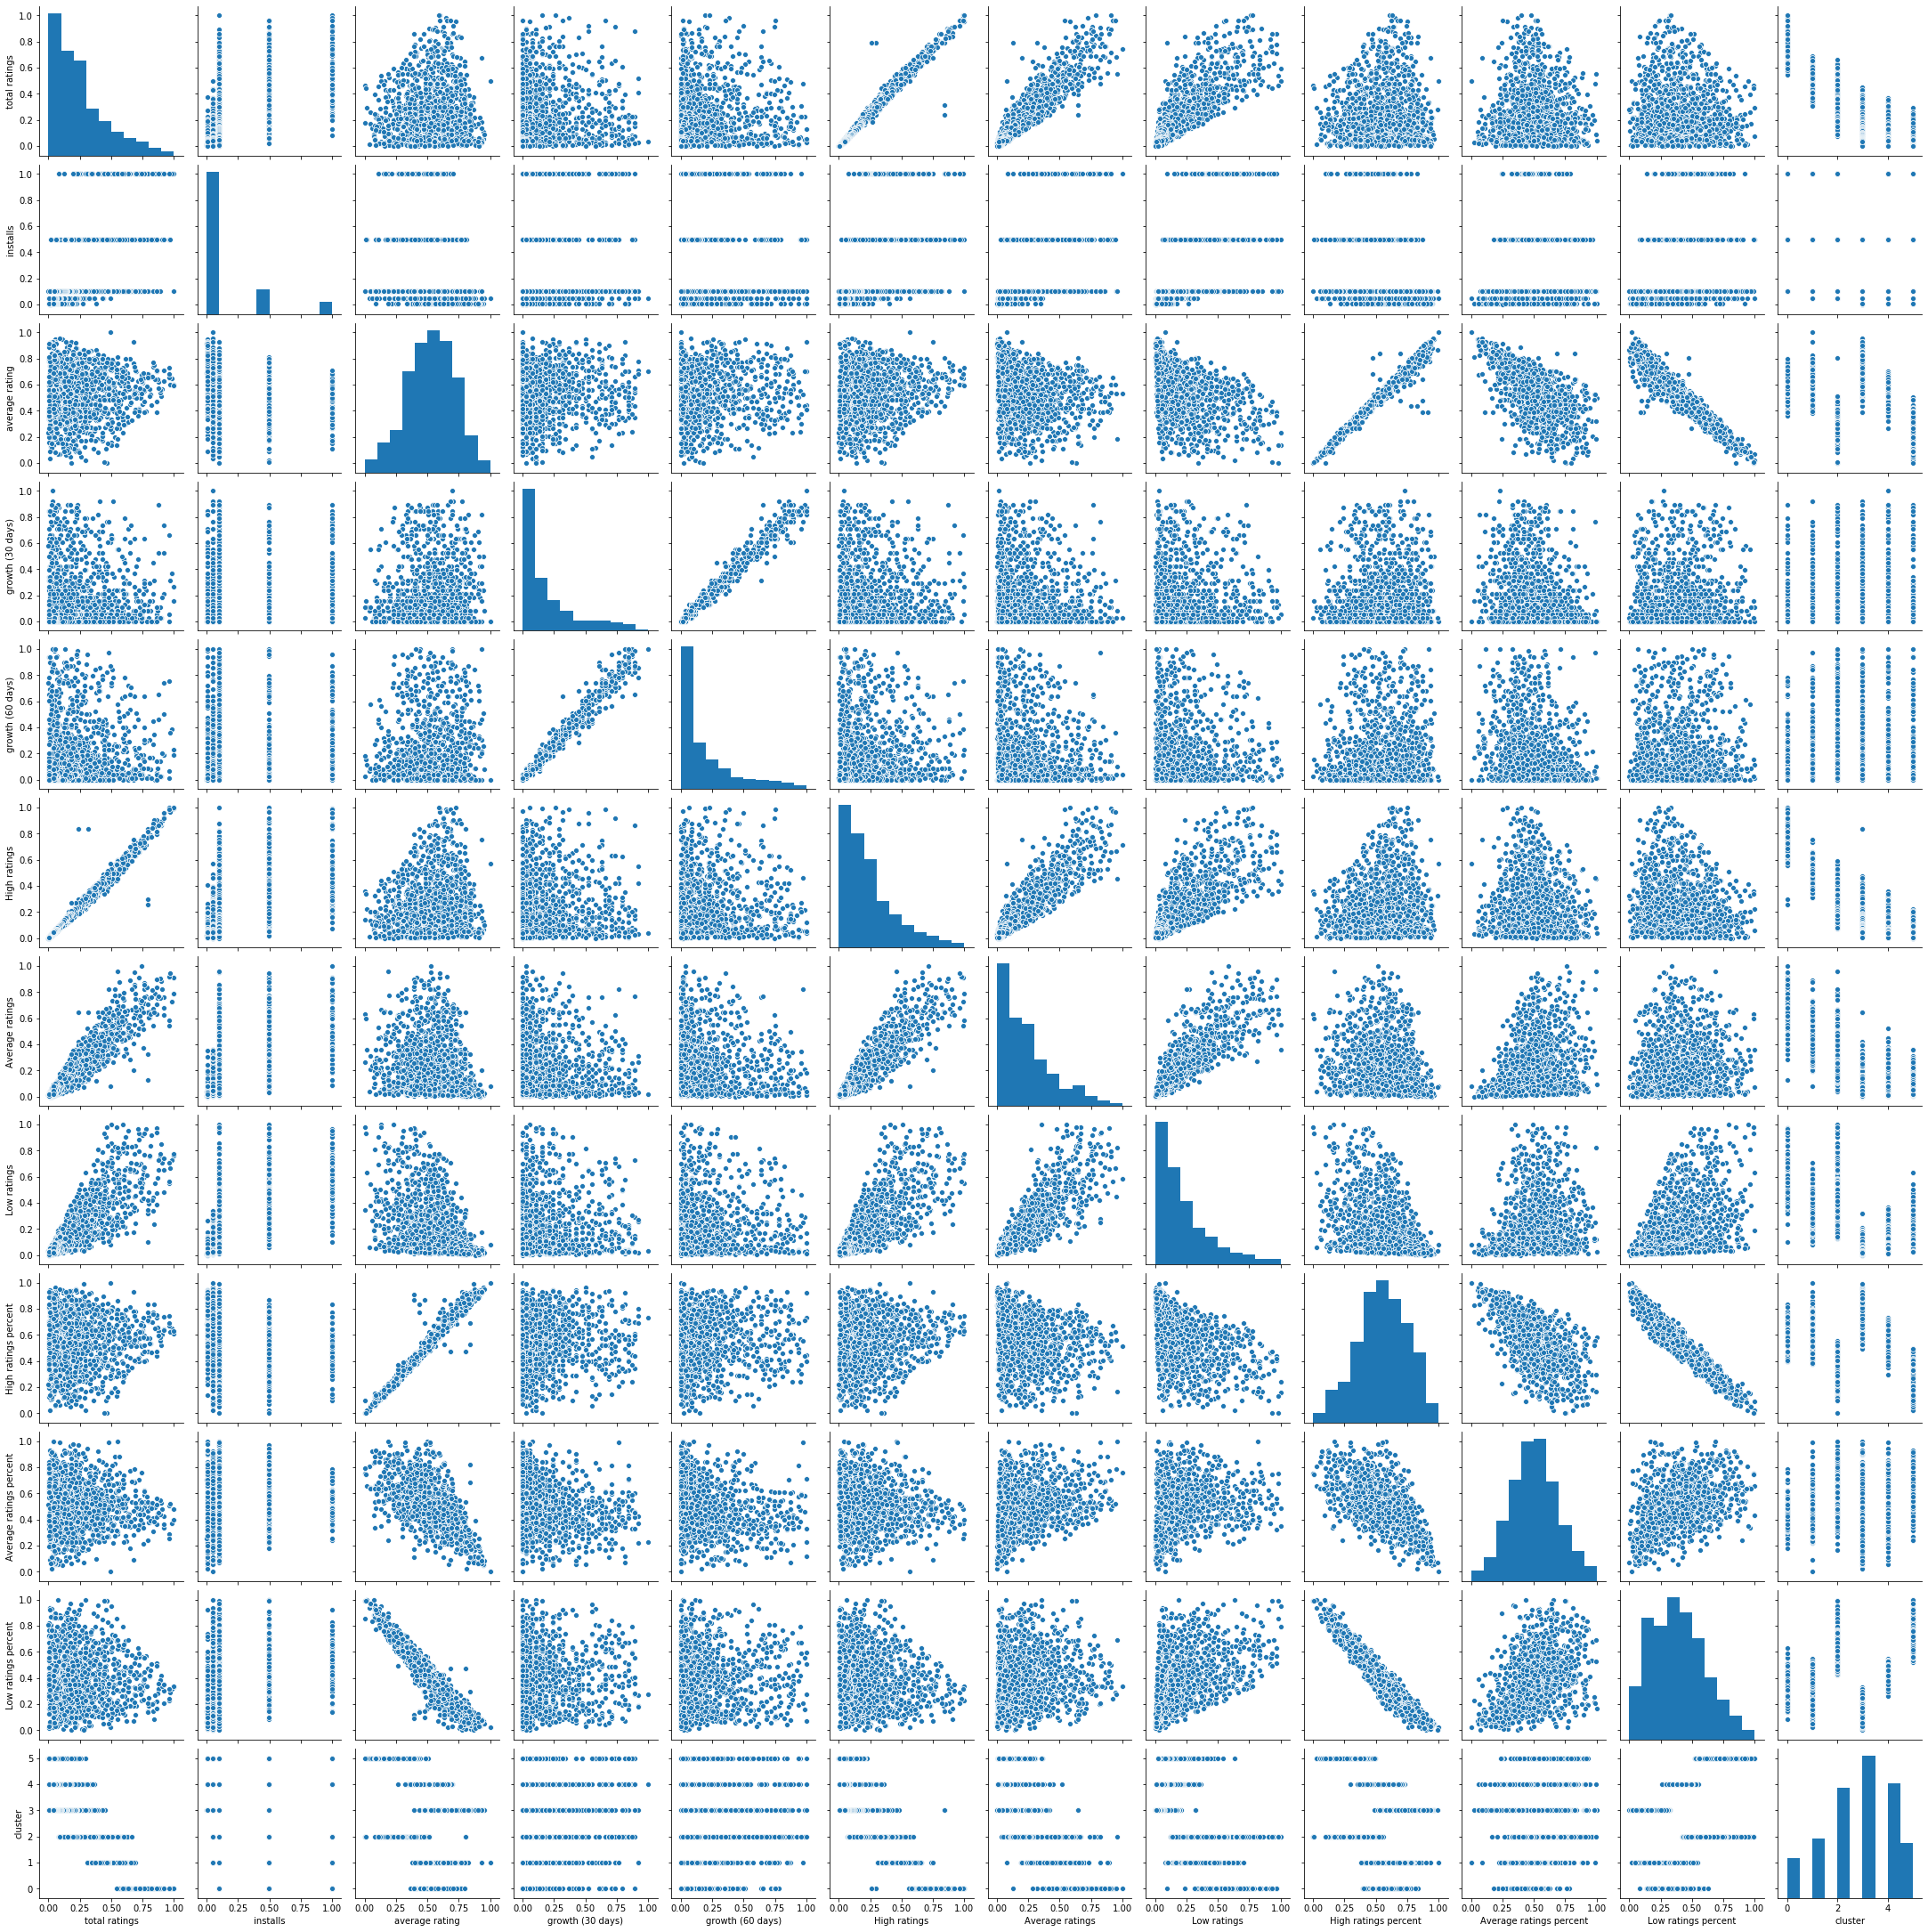

In [132]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

sns.pairplot(df_final)

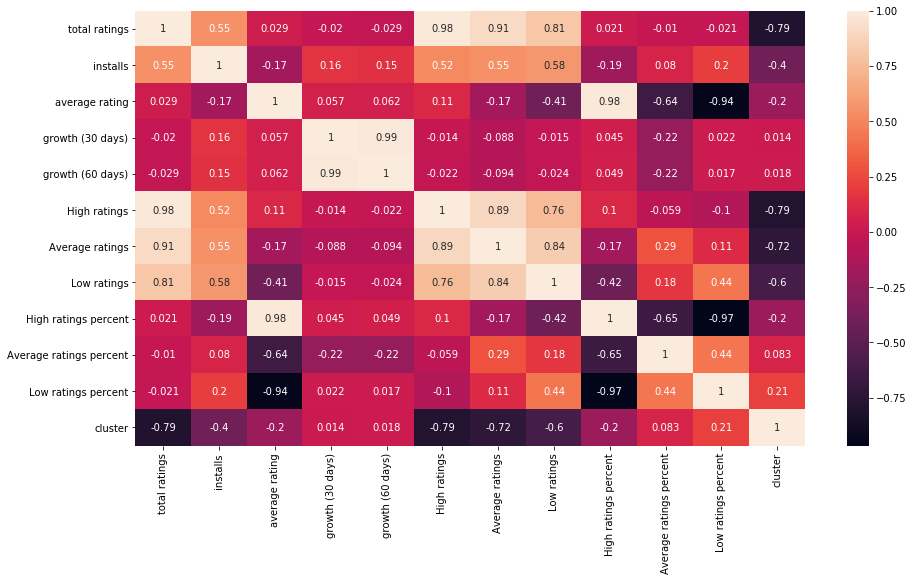

In [133]:
sns.heatmap(df_final.corr(),annot=True)

In [134]:
train_cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 0.04715408  0.03200763  0.00182098 -0.00027465 -0.00069747  0.04612478
   0.04144365  0.03763347  0.00136719 -0.00138906 -0.00119007]
 [ 0.03200763  0.06937638 -0.00835371  0.00818616  0.00817242  0.03009683
   0.0315907   0.03319491 -0.01021014  0.00422235  0.01125649]
 [ 0.00182098 -0.00835371  0.03649749  0.00276741  0.00342302  0.00502766
  -0.00612228 -0.01605838  0.03737773 -0.02300544 -0.03830111]
 [-0.00027465  0.00818616  0.00276741  0.04682243  0.04924889  0.00013094
  -0.00401131 -0.00080772  0.00240637 -0.01031051  0.00093489]
 [-0.00069747  0.00817242  0.00342302  0.04924889  0.05331048 -0.00018721
  -0.00463334 -0.00130611  0.00302577 -0.01135285  0.00055482]
 [ 0.04612478  0.03009683  0.00502766  0.00013094 -0.00018721  0.04662504
   0.04016124  0.03452198  0.00508666 -0.00351252 -0.00506529]
 [ 0.04144365  0.0315907  -0.00612228 -0.00401131 -0.00463334  0.04016124
   0.04359157  0.03752889 -0.00690878  0.01048587  0.00467854]
 [ 0.03763347  0.03

In [135]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-4.18490628e-01 -2.42426191e-01 -8.94687094e-02 -2.26518296e-01
   2.15837790e-02 -2.94139720e-01 -3.24764717e-01 -7.15698190e-01
  -4.57255031e-02  3.01203834e-03  4.59623771e-16]
 [-4.38148186e-01 -8.86411011e-02  1.62876669e-01  8.78783884e-01
  -3.98315027e-03 -3.16744752e-02 -3.06648407e-03  1.77153733e-03
   5.02230024e-03  1.79470145e-02 -5.47189051e-18]
 [ 1.60609048e-01 -4.56634785e-01 -1.07114504e-01  7.45065017e-02
  -4.06523877e-02  1.67327847e-01 -3.06696758e-01  1.18042398e-01
  -2.47943456e-02 -7.81282137e-01 -5.63287411e-16]
 [ 6.41348476e-03 -1.56510785e-01  6.39963157e-01 -1.28615169e-01
  -1.28390088e-01  4.15681459e-03 -2.81428662e-02  6.36850956e-02
  -7.25313188e-01  4.40478233e-02  1.72887084e-15]
 [ 1.25987565e-02 -1.70768007e-01  6.82061355e-01 -1.39901518e-01
  -1.34742805e-01  2.99088451e-02  2.58632624e-02 -6.21275150e-02
   6.79181939e-01 -3.21313908e-02 -1.66606045e-15]
 [-3.93365393e-01 -2.83513432e-01 -9.79576886e-02 -2.28495631e-01
 

In [136]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [137]:
pca.explained_variance_

array([2.03617138e-01, 1.37428136e-01, 1.02804932e-01, 3.42820262e-02,
       2.42783223e-02, 4.54708018e-03, 1.75417799e-03, 1.44152875e-03,
       7.03556049e-04, 4.76026960e-04, 2.84662645e-32])

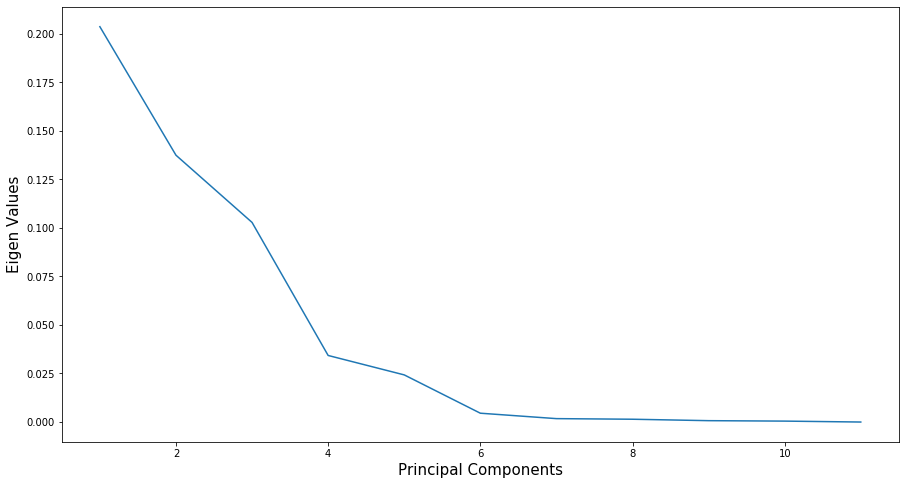

In [138]:
plt.plot(range(1,12),pca.explained_variance_)
plt.xlabel('Principal Components',fontsize=15)
plt.ylabel('Eigen Values',fontsize=15)
plt.show()

In [139]:
pca.explained_variance_ratio_

array([3.98208541e-01, 2.68764497e-01, 2.01052831e-01, 6.70444333e-02,
       4.74804597e-02, 8.89260198e-03, 3.43059855e-03, 2.81915887e-03,
       1.37592558e-03, 9.30953077e-04, 5.56707052e-32])

In [140]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39820854, 0.66697304, 0.86802587, 0.9350703 , 0.98255076,
       0.99144336, 0.99487396, 0.99769312, 0.99906905, 1.        ,
       1.        ])

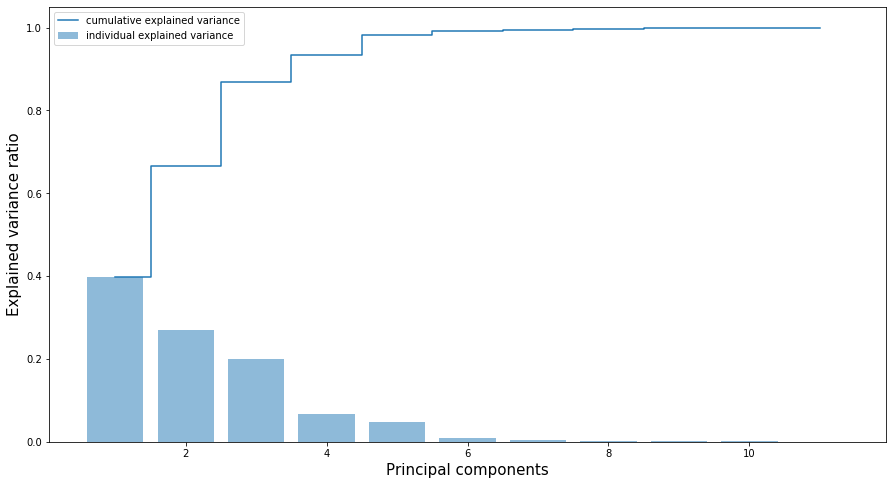

In [141]:
plt.bar(range(1,12), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,12),np.cumsum(pca.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio',fontsize=15)
plt.xlabel('Principal components',fontsize=15)
plt.legend(loc = 'best')
plt.show()

In [142]:
pca2 = PCA(0.95)
pca2.fit(X_train)

PCA(n_components=0.95)

In [143]:
pca2.explained_variance_

array([0.20361714, 0.13742814, 0.10280493, 0.03428203, 0.02427832])

##### The above output shows that 5 components are accounting for a variance of >=95% 

In [144]:
pcs = ['PC'+str(i) for i in range(1,6)]

In [145]:
components = pca2.components_.T
pd.DataFrame(components,index=X_train.columns,columns=pcs)

PC1       PC2       PC3       PC4       PC5
total ratings            0.418491 -0.242426 -0.089469 -0.226518  0.021584
installs                 0.438148 -0.088641  0.162877  0.878784 -0.003983
average rating          -0.160609 -0.456635 -0.107115  0.074507 -0.040652
growth (30 days)        -0.006413 -0.156511  0.639963 -0.128615 -0.128390
growth (60 days)        -0.012599 -0.170768  0.682061 -0.139902 -0.134743
High ratings             0.393365 -0.283513 -0.097958 -0.228496  0.000289
Average ratings          0.424167 -0.106973 -0.111985 -0.188217 -0.259200
Low ratings              0.441820  0.022206  0.002347 -0.194594  0.256048
High ratings percent    -0.177931 -0.483473 -0.122853  0.061028 -0.036341
Average ratings percent  0.111274  0.340078 -0.083475 -0.007824 -0.833416
Low ratings percent      0.181648  0.479045  0.187162 -0.073989  0.366848

##### Examining the loadings to understand the components

- PC1: Explains the games with relation to the number of ratings and installs collectively (positive correlation)

- PC2: Explains the games with relation to the Low ratings percentage (positive correlation) and High ratings percentage (negative correlation)

- PC3: Explains the games with relation to the percentage growth in 30 days and percentage growth in 60 days (positive correlation)

- PC4: Explains the games in relation to purely the number of installs (positive correlation)

- PC5: Explains the games in relation to the Average ratings percentage (negative correlation)

In [146]:
X_train_new_1 = pca2.transform(X_train)
df_new = pd.DataFrame(X_train_new_1,columns=pcs)
df_new.head()

PC1       PC2       PC3       PC4       PC5
0 -0.335858  0.322485 -0.140344  0.005474 -0.153989
1 -0.561120 -0.094377 -0.223572  0.099799  0.170696
2 -0.512365 -0.238446 -0.118335  0.144187 -0.004990
3 -0.485802 -0.349315  0.327321  0.037606  0.150007
4  0.172589  0.833630 -0.061201 -0.160325 -0.113012

In [147]:
df_new.shape

(868, 5)

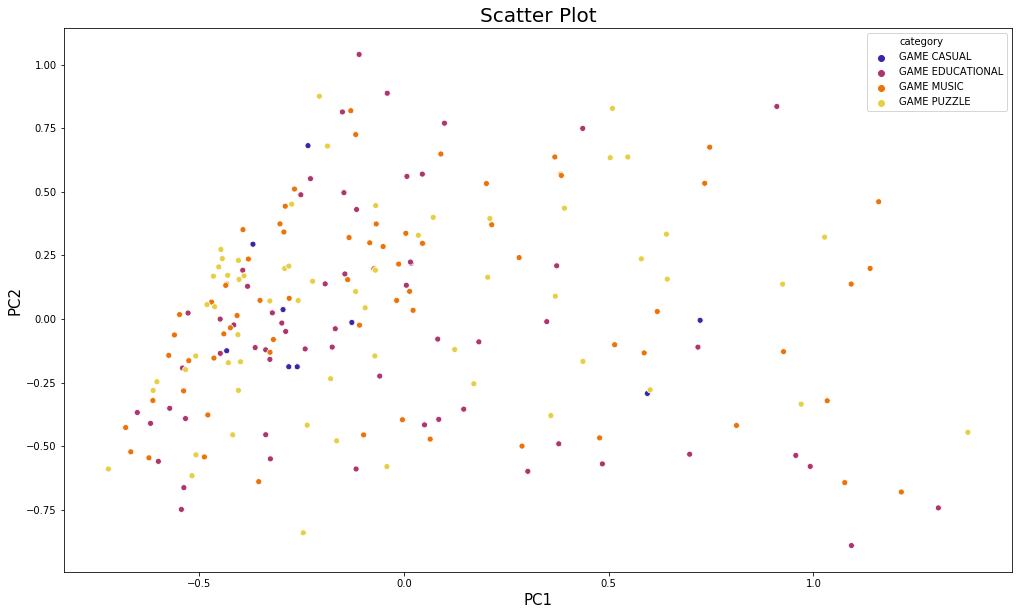

In [148]:
plt.figure(figsize=[17,10])
sns.scatterplot(df_new['PC1'],df_new['PC2'],hue=df_final['category'][500:700],palette='CMRmap')
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title('Scatter Plot',fontsize=20)
plt.show()

In [149]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

#Training the model:
m1_pc=kmeans.fit(X_train_new_1)
clusters = m1_pc.predict(X_train_new_1)

pd.DataFrame(m1_pc.cluster_centers_)

0         1         2         3         4
0  0.644739 -0.081352  0.003277  0.026029  0.004574
1 -0.221567  0.027957 -0.001126 -0.008945 -0.001572

In [150]:
m1_pc.inertia_

309.4080676788791

In [151]:
ssd_pca=[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(X_train_new_1)
    ssd_pca.append(kmeans.inertia_)

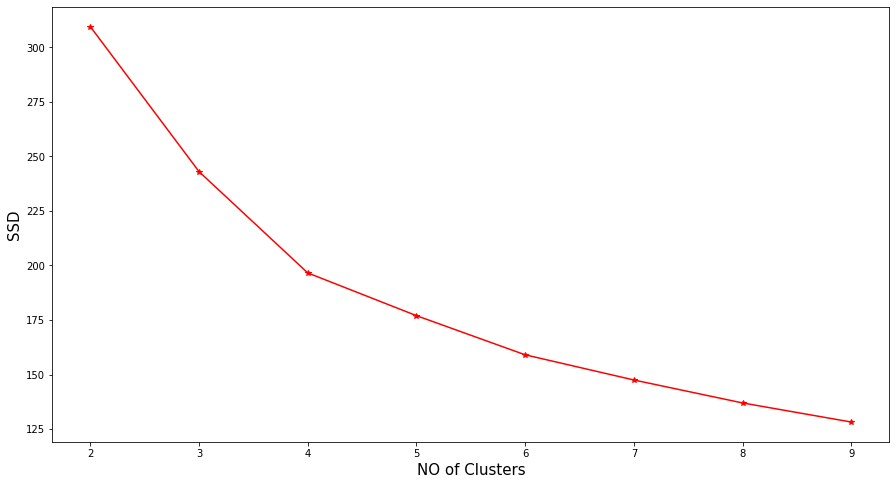

In [152]:
plt.plot(range(2,10),ssd_pca,marker='*',c='red')
plt.xlabel('NO of Clusters',fontsize = '15')
plt.ylabel('SSD',fontsize = '15')
plt.show()

In [153]:
score_pca=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(X_train_new_1)
    ss=silhouette_score(X_train_new_1,kmeans.labels_)
    score_pca.append(ss)

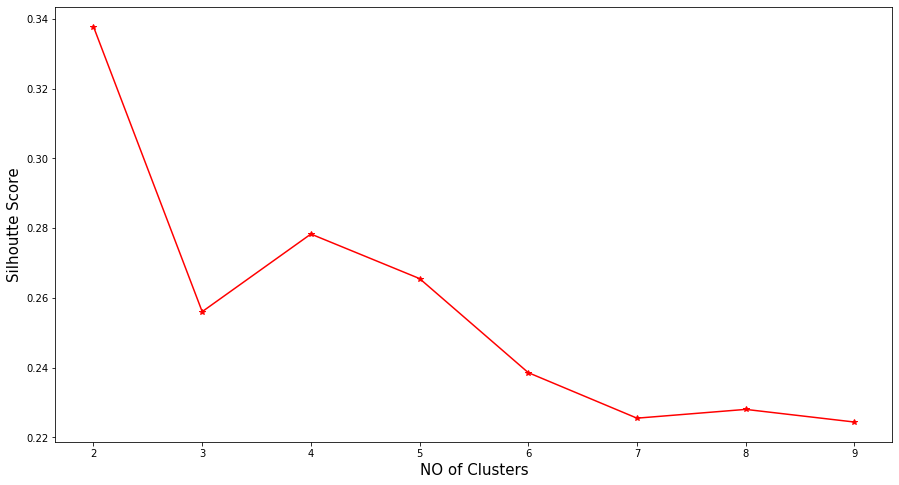

In [154]:
plt.plot(range(2,10),score_pca,color='r',marker='*')
plt.xlabel('NO of Clusters',fontsize = '15')
plt.ylabel('Silhoutte Score',fontsize = '15')
plt.show()

In [155]:
pca = PCA(n_components= 2,random_state=42)
df_PCA_scaled = pca.fit_transform(X_train)

model = KMeans(n_clusters=2,random_state=42)
model.fit(df_PCA_scaled)
cluster = model.labels_

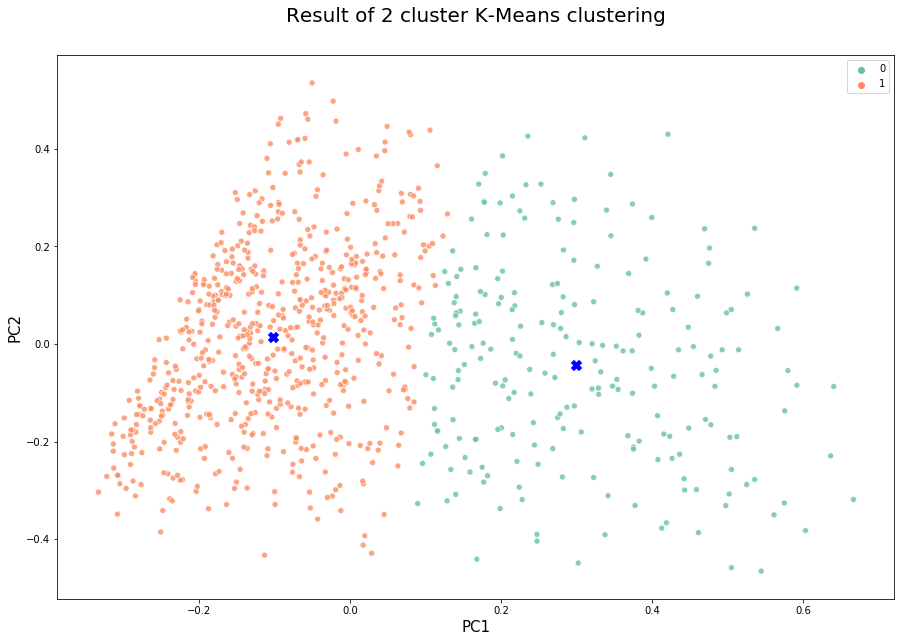

In [156]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df.columns)


xs = df_PCA_scaled[:,0]
ys = df_PCA_scaled[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=model.cluster_centers_[:,0]*scalex, y=model.cluster_centers_[:,1]*scaley, color='b',s=100,marker='X')
        
        
g.set_xlabel("PC{}".format(1),fontsize=15)
g.set_ylabel("PC{}".format(2),fontsize=15)
g.set_title('Result of 2 cluster K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

In [157]:
pca = PCA(n_components= 2,random_state=42)
df_PCA_scaled = pca.fit_transform(X_train)

model = KMeans(n_clusters=3,random_state=42)
model.fit(df_PCA_scaled)
cluster = model.labels_

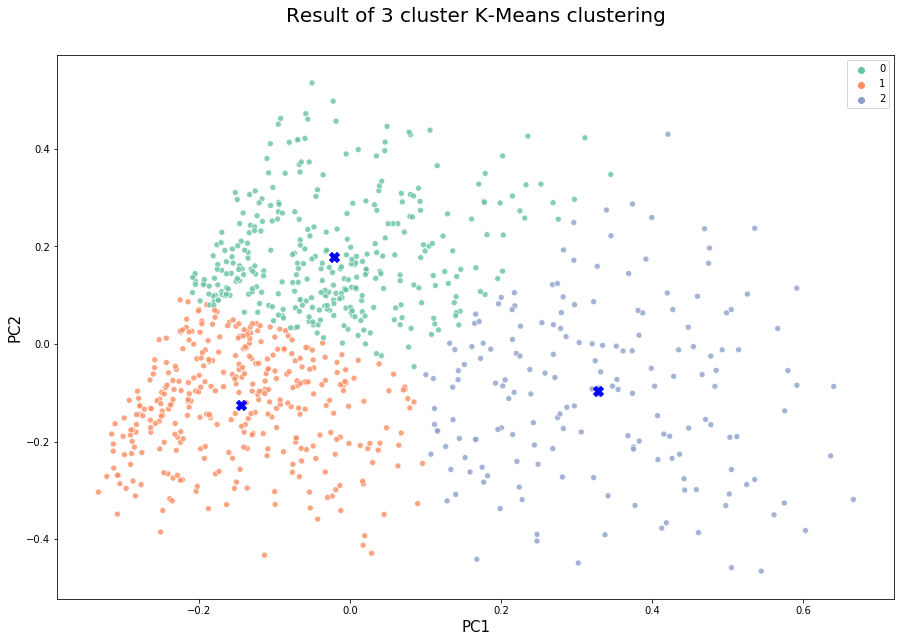

In [158]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df.columns)


xs = df_PCA_scaled[:,0]
ys = df_PCA_scaled[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=model.cluster_centers_[:,0]*scalex, y=model.cluster_centers_[:,1]*scaley, color='b',s=100,marker='X')
        
        
g.set_xlabel("PC{}".format(1),fontsize=15)
g.set_ylabel("PC{}".format(2),fontsize=15)
g.set_title('Result of 3 cluster K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

In [159]:
pca = PCA(n_components= 2,random_state=42)
df_PCA_scaled = pca.fit_transform(X_train)

model = KMeans(n_clusters=4,random_state=42)
model.fit(df_PCA_scaled)
cluster = model.labels_

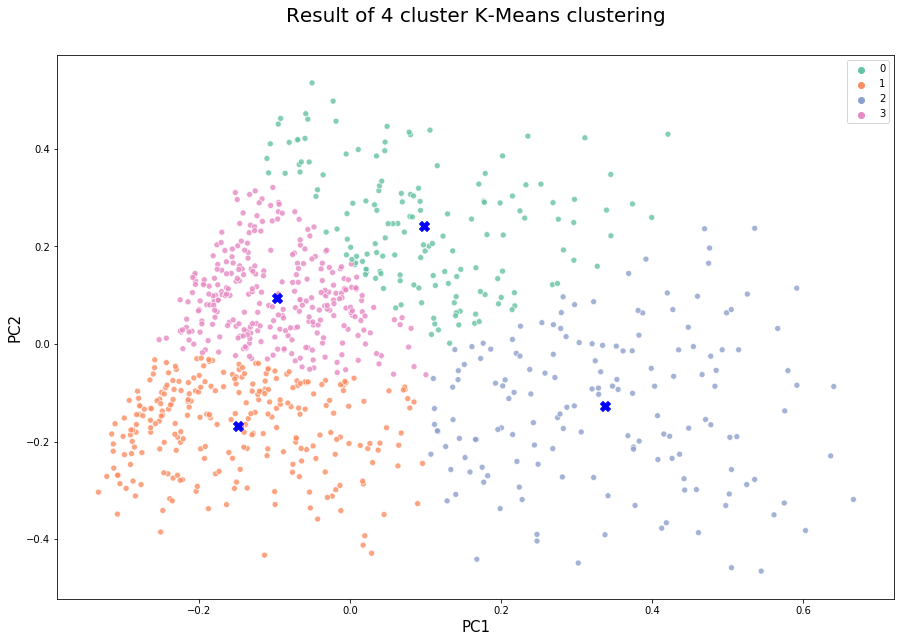

In [160]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df.columns)


xs = df_PCA_scaled[:,0]
ys = df_PCA_scaled[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=model.cluster_centers_[:,0]*scalex, y=model.cluster_centers_[:,1]*scaley, color='b',s=100,marker='X')
        
        
g.set_xlabel("PC{}".format(1),fontsize=15)
g.set_ylabel("PC{}".format(2),fontsize=15)
g.set_title('Result of 4 cluster K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Random Forest Classifier
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_base_model = rf_classification.fit(X_train, y_train)

In [162]:
y_pred = rf_base_model.predict(X_test)

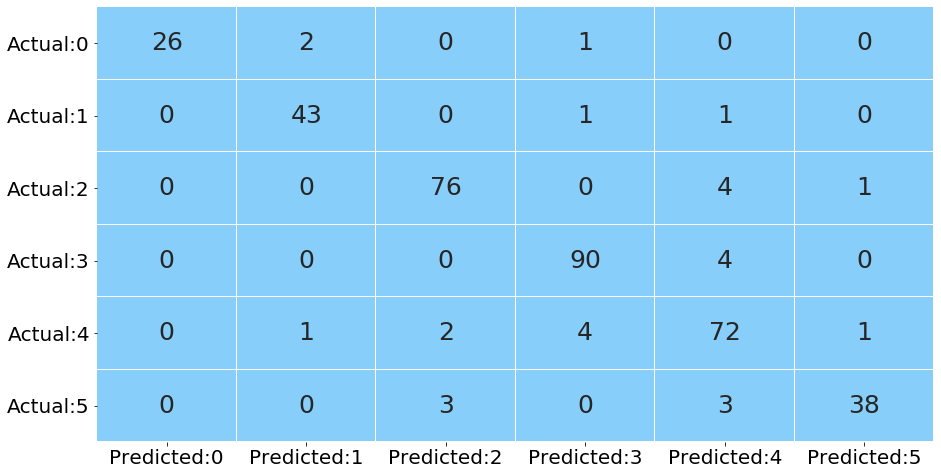

In [163]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20,rotation=360)
plt.show()

In [164]:
y_pred_train = rf_base_model.predict(X_train)

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       193
           5       1.00      1.00      1.00        88

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.93      0.96      0.95        45
           2       0.94      0.94      0.94        81
           3       0.94      0.96      0.95        94
           4       0.86      0.90      0.88        80
           5       0.95      0.86      0.90        44

    accuracy                           0.92       373
   macro avg       0.94      0.92      0.93       373
weighted avg       0.93      0.92      0.93       373



From the above results for the train and test data, we see that there is some overfitting which is persistent in the base model. We will try to address this in the optimized model

### Fitting the model with the PCA components

In [167]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_pca_model = rf_classification.fit(X_train_new_1, y_train)

In [168]:
X_test_new_1 = pca2.transform(X_test)

In [169]:
y_pred_pca = rf_pca_model.predict(X_test_new_1)

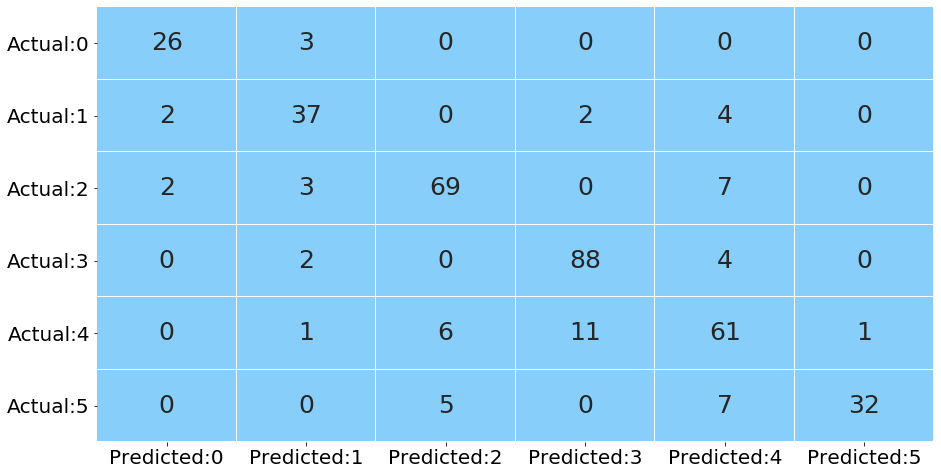

In [170]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_pca),columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20,rotation=360)
plt.show()

In [171]:
y_pred_pca_train = rf_pca_model.predict(X_train_new_1)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_pca_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       0.97      0.99      0.98        96
           2       0.98      1.00      0.99       181
           3       1.00      1.00      1.00       245
           4       1.00      0.98      0.99       193
           5       1.00      0.98      0.99        88

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868



In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.80      0.82      0.81        45
           2       0.86      0.85      0.86        81
           3       0.87      0.94      0.90        94
           4       0.73      0.76      0.75        80
           5       0.97      0.73      0.83        44

    accuracy                           0.84       373
   macro avg       0.85      0.83      0.84       373
weighted avg       0.84      0.84      0.84       373



From the above PCA optimized model, we see that althought the test accuracy has decreased, the overfitting has also decreased ever so slightly

### Model Optimization

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state = 10)


tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': sp_randint(2,250),
                     'max_depth': sp_randint(2,10),
                     'max_features': sp_randint(2,6),
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': sp_randint(1,50)}]
 

random_search = RandomizedSearchCV(estimator = rfc, 
                       param_distributions = tuned_paramaters,
                       n_iter = 5,
                       random_state = 10,
                       scoring = 'roc_auc',
                       cv = 5)

rf_optimized = random_search.fit(X_train_new_1,y_train)

print('Best parameters for random forest classifier: ', rf_optimized.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 115} 



In [175]:
best_params = {'criterion': 'gini', 
               'max_depth': 7, 
               'max_features': 2, 
               'min_samples_leaf': 16, 
               'min_samples_split': 2, 
               'n_estimators': 115} 

In [176]:
rf_classification = RandomForestClassifier(random_state = 10,**best_params)
rf_optimized_model = rf_classification.fit(X_train_new_1, y_train)

In [177]:
y_pred_pca_optimized = rf_optimized_model.predict(X_test_new_1)

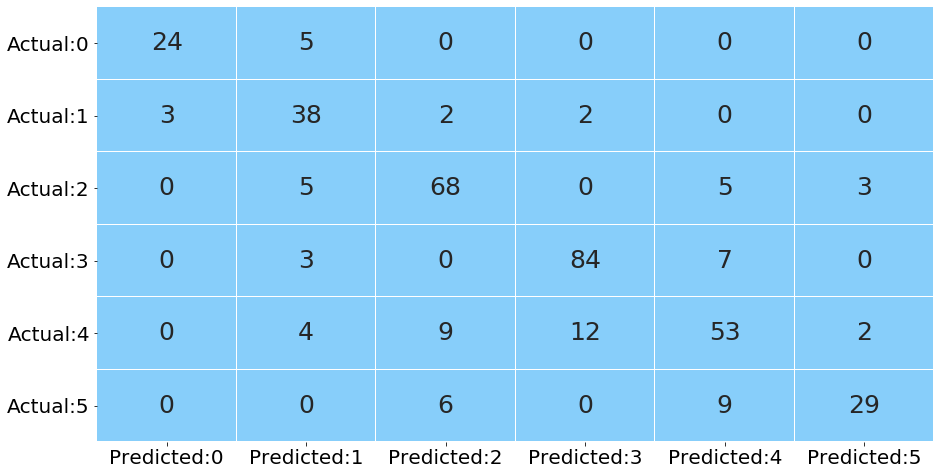

In [178]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_pca_optimized),columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20,rotation=360)
plt.show()

In [179]:
y_pred_pca_optimized_train = rf_optimized_model.predict(X_train_new_1)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_pca_optimized_train))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        65
           1       0.75      0.81      0.78        96
           2       0.82      0.91      0.87       181
           3       0.92      0.91      0.92       245
           4       0.82      0.80      0.81       193
           5       0.93      0.73      0.82        88

    accuracy                           0.86       868
   macro avg       0.86      0.85      0.85       868
weighted avg       0.86      0.86      0.86       868



In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_pca_optimized))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.69      0.84      0.76        45
           2       0.80      0.84      0.82        81
           3       0.86      0.89      0.88        94
           4       0.72      0.66      0.69        80
           5       0.85      0.66      0.74        44

    accuracy                           0.79       373
   macro avg       0.80      0.79      0.79       373
weighted avg       0.80      0.79      0.79       373



From the optimized PCA model above, we see that the overfitting has further reduced significantly, since the difference between the train and test accuracy has reduced

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Popularity based Recommendation System
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [182]:
df_reco = pd.read_csv("android-games.csv")
df_reco.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

In [183]:
df_reco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [184]:
df_reco['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

In [185]:
num3 = []
for i in df_reco['installs']:
    if i.split(' ')[1] == 'M':
        num3.append(int(i.split('.')[0]) * 1000000)
    else:
        num3.append(int(i.split('.')[0]) * 1000)

In [186]:
df_reco['installs'] = num3

In [187]:
df_reco['installs'].value_counts()

10000000      795
50000000      266
5000000       248
100000000     203
1000000       191
500000         13
500000000      10
1000000000      2
100000          2
Name: installs, dtype: int64

In [188]:
pd.DataFrame(df_reco.groupby('title')['average rating'].mean().sort_values(ascending=False))

average rating
title                                                             
超級單字王 - 英檢、多益、托福 輕鬆學                                          4.91
Indy Cat for VK                                               4.87
Английский для Начинающих: LinDuo HD                          4.82
Free Slot Machines with Bonus Games!                          4.82
Word Collect - Free Word Games                                4.82
...                                                            ...
NEW QuizDuel!                                                 3.21
TopQuiz -Play Quiz & Lottery | Win Money via Paytm            3.20
모두의마블                                                         3.16
스케치퀴즈                                                         3.13
Au Mobile VTC – Game nhảy Audition                            3.09

[1672 rows x 1 columns]

In [189]:
popularity_table=df_reco.groupby('title').agg({'average rating':'mean','installs':'mean'})

In [190]:
top_popularity_table=popularity_table[(popularity_table['installs'] >= 500000000)]

In [191]:
top_popularity_table.sort_values('average rating',ascending=False).head(10)

average rating      installs
title                                                     
Candy Crush Saga                        4.56  1.000000e+09
Clash of Clans                          4.49  5.000000e+08
8 Ball Pool                             4.46  5.000000e+08
Subway Surfers                          4.44  1.000000e+09
Garena Free Fire - The Cobra            4.33  5.000000e+08
My Talking Tom                          4.33  5.000000e+08
Ludo King™                              4.28  5.000000e+08
Pou                                     4.28  5.000000e+08
Hill Climb Racing                       4.26  5.000000e+08
Temple Run 2                            4.21  5.000000e+08

The above table gives the list of games which would be recommended to a user who logs into the Google Playstore. The games recommended here are the ones which have a minimum of 500 Million downloads and the highest rating among them

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Content based Recommendation System
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [192]:
df_reco.head()

rank                                         title  total ratings  \
0     1                  Garena Free Fire - The Cobra       80678661   
1     2                   PUBG MOBILE: Graffiti Prank       35971961   
2     3                     Mobile Legends: Bang Bang       25836869   
3     4                                   Brawl Stars       17181659   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554   

    installs  average rating  growth (30 days)  growth (60 days)  price  \
0  500000000            4.33               2.9               7.9    0.0   
1  100000000            4.24               2.0               3.1    0.0   
2  100000000            4.08               1.6               3.3    0.0   
3  100000000            4.27               4.1               6.6    0.0   
4  100000000            4.33               0.8               1.8    0.0   

      category  5 star ratings  4 star ratings  3 star ratings  \
0  GAME ACTION        61935712         4478738         2795172   
1  GAME ACTION        26670566         2109631         1352610   
2  GAME ACTION        17850942         1796761         1066095   
3  GAME ACTION        12493668         1474319          741410   
4  GAME ACTION         9657878         2124544         1034025   

   2 star ratings  1 star ratings   paid  
0         1814999         9654037  False  
1          893674         4945478  False  
2          725429         4397640  False  
3          383478         2088781  False  
4          375159         1045945  False

In [193]:
df_reco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   int64  
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(8), object(2)
memory usage: 191.0+ KB


In [194]:
df_reco['paid'] = df_reco['paid'].astype(object)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Recommendation based on category
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [195]:
df_cont = df_reco[['title','category']]

In [196]:
df_cont = df_cont.set_index('title')

In [197]:
df_cont.head()

category
title                                                    
Garena Free Fire - The Cobra                  GAME ACTION
PUBG MOBILE: Graffiti Prank                   GAME ACTION
Mobile Legends: Bang Bang                     GAME ACTION
Brawl Stars                                   GAME ACTION
Sniper 3D: Fun Free Online FPS Shooting Game  GAME ACTION

In [198]:
df_cont =pd.get_dummies(df_cont)

In [199]:
from sklearn.neighbors import NearestNeighbors

In [200]:
nn = NearestNeighbors(metric='cosine')
nn.fit(df_cont)

NearestNeighbors(metric='cosine')

In [201]:
df_cont.head(10)

category_GAME ACTION  \
title                                                                
Garena Free Fire - The Cobra                                     1   
PUBG MOBILE: Graffiti Prank                                      1   
Mobile Legends: Bang Bang                                        1   
Brawl Stars                                                      1   
Sniper 3D: Fun Free Online FPS Shooting Game                     1   
Shadow Fight 2                                                   1   
Call of Duty®: Mobile - Day of Reckoning                         1   
Among Us                                                         1   
Temple Run 2                                                     1   
PUBG MOBILE LITE                                                 1   

                                              category_GAME ADVENTURE  \
title                                                                   
Garena Free Fire - The Cobra                                        0   
PUBG MOBILE: Graffiti Prank                                         0   
Mobile Legends: Bang Bang                                           0   
Brawl Stars                                                         0   
Sniper 3D: Fun Free Online FPS Shooting Game                        0   
Shadow Fight 2                                                      0   
Call of Duty®: Mobile - Day of Reckoning                            0   
Among Us                                                            0   
Temple Run 2                                                        0   
PUBG MOBILE LITE                                                    0   

                                              category_GAME ARCADE  \
title                                                                
Garena Free Fire - The Cobra                                     0   
PUBG MOBILE: Graffiti Prank                                      0   
Mobile Legends: Bang Bang                                        0   
Brawl Stars                                                      0   
Sniper 3D: Fun Free Online FPS Shooting Game                     0   
Shadow Fight 2                                                   0   
Call of Duty®: Mobile - Day of Reckoning                         0   
Among Us                                                         0   
Temple Run 2                                                     0   
PUBG MOBILE LITE                                                 0   

                                              category_GAME BOARD  \
title                                                               
Garena Free Fire - The Cobra                                    0   
PUBG MOBILE: Graffiti Prank                                     0   
Mobile Legends: Bang Bang                                       0   
Brawl Stars                                                     0   
Sniper 3D: Fun Free Online FPS Shooting Game                    0   
Shadow Fight 2                                                  0   
Call of Duty®: Mobile - Day of Reckoning                        0   
Among Us                                                        0   
Temple Run 2                                                    0   
PUBG MOBILE LITE                                                0   

                                              category_GAME CARD  \
title                                                              
Garena Free Fire - The Cobra                                   0   
PUBG MOBILE: Graffiti Prank                                    0   
Mobile Legends: Bang Bang                                      0   
Brawl Stars                                                    0   
Sniper 3D: Fun Free Online FPS Shooting Game                   0   
Shadow Fight 2                                                 0   
Call of Duty®: Mobile - Day of Reckoning                       0   
Among Us                                      

In [202]:
dis,ind = nn.kneighbors(X=df_cont.iloc[125,:].values.reshape(1,-1),n_neighbors=10)

In [203]:
ind

array([[131, 130, 134, 133, 132, 136, 127, 128, 138, 129]], dtype=int64)

In [204]:
df_cont.index[ind[0]]

Index(['Animation Throwdown: The Collectible Card Game',
       'RealmCraft with Skins Export to Minecraft',
       'House Designer : Fix & Flip', 'Jurassic World Alive',
       'Knives Out-No rules, just fight!', 'Crab War : Idle Swarm Evolution',
       'ARK: Survival Evolved',
       'Sonic Forces – Multiplayer Racing & Battle Game',
       'Mystery Manor: hidden objects', 'Beggar Life - Clicker adventure'],
      dtype='object', name='title')

In [205]:
df_reco.iloc[[125]]

rank                                      title  total ratings  installs  \
125    26  Eyes: Scary Thriller - Creepy Horror Game         654364  10000000   

     average rating  growth (30 days)  growth (60 days)  price  \
125             4.4               1.0               1.9    0.0   

           category  5 star ratings  4 star ratings  3 star ratings  \
125  GAME ADVENTURE          487793           64046           32508   

     2 star ratings  1 star ratings   paid  
125           16549           53467  False

In [206]:
df_reco.iloc[[131, 130, 134, 133, 132, 136, 127, 128, 138, 129]]

rank                                            title  total ratings  \
131    32   Animation Throwdown: The Collectible Card Game         528493   
130    31        RealmCraft with Skins Export to Minecraft         530531   
134    35                      House Designer : Fix & Flip         520995   
133    34                             Jurassic World Alive         521392   
132    33                 Knives Out-No rules, just fight!         526011   
136    37                  Crab War : Idle Swarm Evolution         491712   
127    28                            ARK: Survival Evolved         617412   
128    29  Sonic Forces – Multiplayer Racing & Battle Game         597627   
138    39                    Mystery Manor: hidden objects         479435   
129    30                  Beggar Life - Clicker adventure         545364   

     installs  average rating  growth (30 days)  growth (60 days)  price  \
131  10000000            4.44               0.3               0.7    0.0   
130  50000000            4.11               2.3               5.1    0.0   
134  50000000            4.12               3.2               8.4    0.0   
133  10000000            4.35               1.1               2.4    0.0   
132  10000000            3.39               0.5               1.0    0.0   
136   5000000            4.54               0.4               1.0    0.0   
127  10000000            4.00               3.0               6.9    0.0   
128  50000000            4.42               2.5               5.3    0.0   
138  10000000            4.58               2.7               5.9    0.0   
129   5000000            4.22               0.1               0.2    0.0   

           category  5 star ratings  4 star ratings  3 star ratings  \
131  GAME ADVENTURE          369221           92285           27535   
130  GAME ADVENTURE          360272           45518           26510   
134  GAME ADVENTURE          337935           61651           34116   
133  GAME ADVENTURE          368121           67896           28777   
132  GAME ADVENTURE          260354           40125           34962   
136  GAME ADVENTURE          364394           72835           28682   
127  GAME ADVENTURE          386395           66048           42074   
128  GAME ADVENTURE          451959           56568           25606   
138  GAME ADVENTURE          343892          101188           16455   
129  GAME ADVENTURE          370907           60083           36938   

     2 star ratings  1 star ratings   paid  
131           11146           28304  False  
130           18330           79898  False  
134           20254           67036  False  
133           14238           42356  False  
132           24636          165933  False  
136            8182           17617  False  
127           23449           99444  False  
128           14326           49165  False  
138            5893           12005  False  
129           18369           59064  False

The above table shows the list of the 10 games which would be recommended to a user, who previously installed the game "Eyes: Scary Thriller - Creepy Horror Game" from the "Adventure" category

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Recommendation based on Installs and Ratings
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [207]:
df_cont_2 = df_reco[['title','installs','total ratings','average rating','5 star ratings','4 star ratings',
                     '3 star ratings','2 star ratings','1 star ratings']]

In [208]:
df_cont_2 = df_cont_2.set_index('title')

In [209]:
df_cont_2.head(20)

installs  total ratings  \
title                                                                    
Garena Free Fire - The Cobra                  500000000       80678661   
PUBG MOBILE: Graffiti Prank                   100000000       35971961   
Mobile Legends: Bang Bang                     100000000       25836869   
Brawl Stars                                   100000000       17181659   
Sniper 3D: Fun Free Online FPS Shooting Game  100000000       14237554   
Shadow Fight 2                                100000000       14048931   
Call of Duty®: Mobile - Day of Reckoning      100000000       13020115   
Among Us                                      100000000       11298789   
Temple Run 2                                  500000000        9554877   
PUBG MOBILE LITE                              100000000        7392911   
slither.io                                    100000000        6475640   
Gangstar Vegas: World of Crime                100000000        6203689   
Pixel Gun 3D: FPS Shooter & Battle Royale     100000000        5651287   
Bowmasters                                    100000000        5245027   
Standoff 2                                     50000000        4457338   
Crossy Road                                   100000000        4456347   
Banana Kong                                   100000000        4448938   
Garena Liên Quân Mobile                        50000000        4443546   
Helix Jump                                    100000000        4260419   
War Robots. 6v6 Tactical Multiplayer Battles   50000000        4193941   

                                              average rating  5 star ratings  \
title                                                                          
Garena Free Fire - The Cobra                            4.33        61935712   
PUBG MOBILE: Graffiti Prank                             4.24        26670566   
Mobile Legends: Bang Bang                               4.08        17850942   
Brawl Stars                                             4.27        12493668   
Sniper 3D: Fun Free Online FPS Shooting Game            4.33         9657878   
Shadow Fight 2                                          4.57        11532143   
Call of Duty®: Mobile - Day of Reckoning                4.47        10079925   
Among Us                                                3.65         6173970   
Temple Run 2                                            4.21         6521348   
PUBG MOBILE LITE                                        4.16         5231571   
slither.io                                              4.07         4089508   
Gangstar Vegas: World of Crime                          4.30         4466149   
Pixel Gun 3D: FPS Shooter & Battle Royale               4.15         3855710   
Bowmasters                                              4.55         4170692   
Standoff 2                                              4.54         3611434   
Crossy Road                                             4.54         3378135   
Banana Kong                                             4.57         3440564   
Garena Liên Quân Mobile                                 4.11         3055909   
Helix Jump                                              4.07         2654404   
War Robots. 6v6 Tactical Multiplayer Battles            4.00         2635805   

                                              4 star ratings  3 star ratings  \
title                                                                          
Garena Free Fire - The Cobra                         4478738         2795172   
PUBG MOBILE: Graffiti Prank                          2109631         1352610   
Mobile Legends: Bang Bang                            1796761         1066095   
Brawl Stars                                          1474319          741410   
Sniper 3D: Fun Free Online FPS Shooting Game         2124544         1034025   
Shadow Fight 2                                        961926          448184   
Call of Duty®: Mo

In [210]:
nn = NearestNeighbors(metric='euclidean')
nn.fit(df_cont_2)

NearestNeighbors(metric='euclidean')

In [211]:
dis2,ind2 = nn.kneighbors(X=df_cont_2.iloc[5,:].values.reshape(1,-1),n_neighbors = 11)

In [212]:
ind2

array([[   5, 1324,    6,    4,  101,  625,    3,  627,  628,  629,    7]],
      dtype=int64)

In [213]:
df_cont_2.index[ind2[0]]

Index(['Shadow Fight 2', 'Dream League Soccer',
       'Call of Duty®: Mobile - Day of Reckoning',
       'Sniper 3D: Fun Free Online FPS Shooting Game', 'Pokémon GO', 'Hay Day',
       'Brawl Stars', 'Minion Rush: Despicable Me Official Game',
       'Gardenscapes', 'Homescapes', 'Among Us'],
      dtype='object', name='title')

In [214]:
df_reco.iloc[[   5, 1324,    6,    4,  101,  625,    3,  627,  628,  629,    7]]

rank                                         title  total ratings  \
5        6                                Shadow Fight 2       14048931   
1324     1                           Dream League Soccer       13374620   
6        7      Call of Duty®: Mobile - Day of Reckoning       13020115   
4        5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554   
101      2                                    Pokémon GO       14401261   
625      4                                       Hay Day       11955303   
3        4                                   Brawl Stars       17181659   
627      6      Minion Rush: Despicable Me Official Game       10647190   
628      7                                  Gardenscapes       10561106   
629      8                                    Homescapes        9950630   
7        8                                      Among Us       11298789   

       installs  average rating  growth (30 days)  growth (60 days)  price  \
5     100000000            4.57               0.6               1.5    0.0   
1324  100000000            4.45               0.0               0.1    0.0   
6     100000000            4.47               2.8               5.1    0.0   
4     100000000            4.33               0.8               1.8    0.0   
101   100000000            4.10               0.7               1.2    0.0   
625   100000000            4.41               0.2               0.5    0.0   
3     100000000            4.27               4.1               6.6    0.0   
627   100000000            4.40               0.1               0.1    0.0   
628   100000000            4.36               1.0               2.5    0.0   
629   100000000            4.35               1.7               3.9    0.0   
7     100000000            3.65               6.3              12.3    0.0   

            category  5 star ratings  4 star ratings  3 star ratings  \
5        GAME ACTION        11532143          961926          448184   
1324     GAME SPORTS        10064893         1456557          649320   
6        GAME ACTION        10079925         1210326          488294   
4        GAME ACTION         9657878         2124544         1034025   
101   GAME ADVENTURE         9302104         1728142          885234   
625      GAME CASUAL         8872129         1242739          602283   
3        GAME ACTION        12493668         1474319          741410   
627      GAME CASUAL         7892782         1106289          539035   
628      GAME CASUAL         7477650         1401119          583497   
629      GAME CASUAL         6974932         1342886          575548   
7        GAME ACTION         6173970         1026476          770574   

      2 star ratings  1 star ratings   paid  
5             217044          889631  False  
1324          268502          935345  False  
6             261610          979958  False  
4             375159         1045945  False  
101           460683         2025096  False  
625           298057          940093  False  
3             383478         2088781  False  
627           232383          876698  False  
628           252414          846424  False  
629           244526          812736  False  
7             614021         2713745  False

The above table shows the list of the 10 games which would be recommended to a user, who previously installed the game "Shadow Fight 2". Here the recommendation is done based on the number of installs and the ratings the previous game had received.

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Recommendation based on Installs, Ratings and Categories
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [215]:
df_cont_3 = df_reco[['title','installs','total ratings','average rating','category','5 star ratings','4 star ratings',
                     '3 star ratings','2 star ratings','1 star ratings']]

In [216]:
df_cont_3 = df_cont_3.set_index('title')

In [217]:
df_cont_3.head(20)

installs  total ratings  \
title                                                                    
Garena Free Fire - The Cobra                  500000000       80678661   
PUBG MOBILE: Graffiti Prank                   100000000       35971961   
Mobile Legends: Bang Bang                     100000000       25836869   
Brawl Stars                                   100000000       17181659   
Sniper 3D: Fun Free Online FPS Shooting Game  100000000       14237554   
Shadow Fight 2                                100000000       14048931   
Call of Duty®: Mobile - Day of Reckoning      100000000       13020115   
Among Us                                      100000000       11298789   
Temple Run 2                                  500000000        9554877   
PUBG MOBILE LITE                              100000000        7392911   
slither.io                                    100000000        6475640   
Gangstar Vegas: World of Crime                100000000        6203689   
Pixel Gun 3D: FPS Shooter & Battle Royale     100000000        5651287   
Bowmasters                                    100000000        5245027   
Standoff 2                                     50000000        4457338   
Crossy Road                                   100000000        4456347   
Banana Kong                                   100000000        4448938   
Garena Liên Quân Mobile                        50000000        4443546   
Helix Jump                                    100000000        4260419   
War Robots. 6v6 Tactical Multiplayer Battles   50000000        4193941   

                                              average rating     category  \
title                                                                       
Garena Free Fire - The Cobra                            4.33  GAME ACTION   
PUBG MOBILE: Graffiti Prank                             4.24  GAME ACTION   
Mobile Legends: Bang Bang                               4.08  GAME ACTION   
Brawl Stars                                             4.27  GAME ACTION   
Sniper 3D: Fun Free Online FPS Shooting Game            4.33  GAME ACTION   
Shadow Fight 2                                          4.57  GAME ACTION   
Call of Duty®: Mobile - Day of Reckoning                4.47  GAME ACTION   
Among Us                                                3.65  GAME ACTION   
Temple Run 2                                            4.21  GAME ACTION   
PUBG MOBILE LITE                                        4.16  GAME ACTION   
slither.io                                              4.07  GAME ACTION   
Gangstar Vegas: World of Crime                          4.30  GAME ACTION   
Pixel Gun 3D: FPS Shooter & Battle Royale               4.15  GAME ACTION   
Bowmasters                                              4.55  GAME ACTION   
Standoff 2                                              4.54  GAME ACTION   
Crossy Road                                             4.54  GAME ACTION   
Banana Kong                                             4.57  GAME ACTION   
Garena Liên Quân Mobile                                 4.11  GAME ACTION   
Helix Jump                                              4.07  GAME ACTION   
War Robots. 6v6 Tactical Multiplayer Battles            4.00  GAME ACTION   

                                              5 star ratings  4 star ratings  \
title                                                                          
Garena Free Fire - The Cobra                        61935712         4478738   
PUBG MOBILE: Graffiti Prank                         26670566         2109631   
Mobile Legends: Bang Bang                           17850942         1796761   
Brawl Stars                                         12493668         1474319   
Sniper 3D: Fun Free Online FPS Shooting Game         9657878         2124544   
Shadow Fight 2                                      11532143          961926   
Call of Duty®: Mobile - Day of Reckoning            10079925         1210326   
Amo

In [218]:
df_cont_3 =pd.get_dummies(df_cont_3)

In [219]:
nn = NearestNeighbors(metric='cosine')
nn.fit(df_cont_3)

NearestNeighbors(metric='cosine')

In [220]:
dis3,ind3 = nn.kneighbors(X=df_cont_3.iloc[682,:].values.reshape(1,-1),n_neighbors=11)

In [221]:
ind3

array([[ 682, 1468, 1408, 1326, 1152, 1071,  264, 1467,  686,  265, 1505]],
      dtype=int64)

In [222]:
df_cont_3.index[ind3[0]]

Index(['Virtual Families 2', 'Army Men Strike - Military Strategy Simulator',
       'Stick Cricket Premier League', 'Score! Hero', 'School of Dragons',
       'Asphalt Xtreme: Rally Racing', 'Stick Hero', 'METAL SLUG DEFENSE',
       'Wonder Zoo - Animal rescue !', 'Zombie High School', 'Onmyoji Arena'],
      dtype='object', name='title')

In [223]:
df_reco.iloc[[ 682, 1468, 1408, 1326, 1152, 1071,  264, 1467,  686,  265, 1505]]

rank                                          title  total ratings  \
682     61                             Virtual Families 2         678631   
1468    45  Army Men Strike - Military Strategy Simulator         672510   
1408    85                   Stick Cricket Premier League         334400   
1326     3                                    Score! Hero        6779161   
1152    29                              School of Dragons         659860   
1071    48                   Asphalt Xtreme: Rally Racing         677946   
264     65                                     Stick Hero         690408   
1467    44                             METAL SLUG DEFENSE         695798   
686     65                   Wonder Zoo - Animal rescue !         656887   
265     66                             Zombie High School         684029   
1505    82                                  Onmyoji Arena         334450   

       installs  average rating  growth (30 days)  growth (60 days)  price  \
682    10000000            4.15               0.0               0.1    0.0   
1468   10000000            4.14               0.4               0.8    0.0   
1408    5000000            4.21               0.1               0.2    0.0   
1326  100000000            4.19               0.4               0.9    0.0   
1152   10000000            4.16               0.4               0.9    0.0   
1071   10000000            4.13               0.4               0.8    0.0   
264    10000000            4.26               0.0               0.0    0.0   
1467   10000000            4.04             328.4               0.1    0.0   
686    10000000            4.29               0.2               0.4    0.0   
265    10000000            3.99               0.0               0.1    0.0   
1505    5000000            4.28               0.8               2.8    0.0   

               category  5 star ratings  4 star ratings  3 star ratings  \
682         GAME CASUAL          431803           90825           55961   
1468      GAME STRATEGY          419583          102399           53691   
1408        GAME SPORTS          218684           48933           21412   
1326        GAME SPORTS         4480503          844263          462636   
1152  GAME ROLE PLAYING          435584           76096           44371   
1071        GAME RACING          445396           79313           39681   
264         GAME ARCADE          457063           98278           54702   
1467      GAME STRATEGY          435845           80475           54242   
686         GAME CASUAL          451989           82929           43740   
265         GAME ARCADE          403782           94046           58979   
1505      GAME STRATEGY          230361           43143           18956   

      2 star ratings  1 star ratings   paid  
682            24391           75649  False  
1468           21212           75623  False  
1408            9093           36275  False  
1326          219496          772261  False  
1152           24027           79779  False  
1071           20829           92724  False  
264            19323           61040  False  
1467           22828          102405  False  
686            19634           58593  False  
265            27439           99781  False  
1505            9822           32165  False

The above table shows the list of the 10 games which would be recommended to a user, who previously installed the game "Virtual Families 2". Here the recommendation is done based on the category, the number of installs and the ratings the previous game had received.

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Recommendation based on Installs and Ratings within a specific category
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [224]:
df_cont_4 = df_reco[df_reco['category'] == 'GAME ACTION']
df_cont_4.head()

rank                                         title  total ratings  \
0     1                  Garena Free Fire - The Cobra       80678661   
1     2                   PUBG MOBILE: Graffiti Prank       35971961   
2     3                     Mobile Legends: Bang Bang       25836869   
3     4                                   Brawl Stars       17181659   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554   

    installs  average rating  growth (30 days)  growth (60 days)  price  \
0  500000000            4.33               2.9               7.9    0.0   
1  100000000            4.24               2.0               3.1    0.0   
2  100000000            4.08               1.6               3.3    0.0   
3  100000000            4.27               4.1               6.6    0.0   
4  100000000            4.33               0.8               1.8    0.0   

      category  5 star ratings  4 star ratings  3 star ratings  \
0  GAME ACTION        61935712         4478738         2795172   
1  GAME ACTION        26670566         2109631         1352610   
2  GAME ACTION        17850942         1796761         1066095   
3  GAME ACTION        12493668         1474319          741410   
4  GAME ACTION         9657878         2124544         1034025   

   2 star ratings  1 star ratings   paid  
0         1814999         9654037  False  
1          893674         4945478  False  
2          725429         4397640  False  
3          383478         2088781  False  
4          375159         1045945  False

In [225]:
df_cont_4.shape

(100, 15)

In [226]:
df_cont_4 = df_cont_4[['title','installs','total ratings','average rating','5 star ratings','4 star ratings',
                     '3 star ratings','2 star ratings','1 star ratings']]

In [227]:
df_cont_4 = df_cont_4.set_index('title')

In [228]:
df_cont_4.head(20)

installs  total ratings  \
title                                                                    
Garena Free Fire - The Cobra                  500000000       80678661   
PUBG MOBILE: Graffiti Prank                   100000000       35971961   
Mobile Legends: Bang Bang                     100000000       25836869   
Brawl Stars                                   100000000       17181659   
Sniper 3D: Fun Free Online FPS Shooting Game  100000000       14237554   
Shadow Fight 2                                100000000       14048931   
Call of Duty®: Mobile - Day of Reckoning      100000000       13020115   
Among Us                                      100000000       11298789   
Temple Run 2                                  500000000        9554877   
PUBG MOBILE LITE                              100000000        7392911   
slither.io                                    100000000        6475640   
Gangstar Vegas: World of Crime                100000000        6203689   
Pixel Gun 3D: FPS Shooter & Battle Royale     100000000        5651287   
Bowmasters                                    100000000        5245027   
Standoff 2                                     50000000        4457338   
Crossy Road                                   100000000        4456347   
Banana Kong                                   100000000        4448938   
Garena Liên Quân Mobile                        50000000        4443546   
Helix Jump                                    100000000        4260419   
War Robots. 6v6 Tactical Multiplayer Battles   50000000        4193941   

                                              average rating  5 star ratings  \
title                                                                          
Garena Free Fire - The Cobra                            4.33        61935712   
PUBG MOBILE: Graffiti Prank                             4.24        26670566   
Mobile Legends: Bang Bang                               4.08        17850942   
Brawl Stars                                             4.27        12493668   
Sniper 3D: Fun Free Online FPS Shooting Game            4.33         9657878   
Shadow Fight 2                                          4.57        11532143   
Call of Duty®: Mobile - Day of Reckoning                4.47        10079925   
Among Us                                                3.65         6173970   
Temple Run 2                                            4.21         6521348   
PUBG MOBILE LITE                                        4.16         5231571   
slither.io                                              4.07         4089508   
Gangstar Vegas: World of Crime                          4.30         4466149   
Pixel Gun 3D: FPS Shooter & Battle Royale               4.15         3855710   
Bowmasters                                              4.55         4170692   
Standoff 2                                              4.54         3611434   
Crossy Road                                             4.54         3378135   
Banana Kong                                             4.57         3440564   
Garena Liên Quân Mobile                                 4.11         3055909   
Helix Jump                                              4.07         2654404   
War Robots. 6v6 Tactical Multiplayer Battles            4.00         2635805   

                                              4 star ratings  3 star ratings  \
title                                                                          
Garena Free Fire - The Cobra                         4478738         2795172   
PUBG MOBILE: Graffiti Prank                          2109631         1352610   
Mobile Legends: Bang Bang                            1796761         1066095   
Brawl Stars                                          1474319          741410   
Sniper 3D: Fun Free Online FPS Shooting Game         2124544         1034025   
Shadow Fight 2                                        961926          448184   
Call of Duty®: Mo

In [229]:
nn = NearestNeighbors(metric='cosine')
nn.fit(df_cont_4)

NearestNeighbors(metric='cosine')

In [230]:
dis4,ind4 = nn.kneighbors(X=df_cont_4.iloc[14,:].values.reshape(1,-1),n_neighbors = 11)

In [231]:
ind4

array([[14, 87, 89, 93, 86, 91, 17, 82, 22, 78, 20]], dtype=int64)

In [232]:
df_cont_4.index[ind4[0]]

Index(['Standoff 2', 'BombSquad', 'PUBG MOBILE VN – GRAFFITI PRANK',
       'Beat the Boss 3', 'Legacy of Discord-FuriousWings', 'Hitman Sniper',
       'Garena Liên Quân Mobile', 'FRONTLINE COMMANDO 2',
       'Last Day on Earth: Survival', 'PUBG MOBILE',
       'MORTAL KOMBAT: The Ultimate Fighting Game!'],
      dtype='object', name='title')

In [233]:
df_reco.iloc[[14, 87, 89, 93, 86, 91, 17, 82, 22, 78, 20]]

rank                                       title  total ratings  installs  \
14    15                                  Standoff 2        4457338  50000000   
87    88                                   BombSquad         894527  10000000   
89    90             PUBG MOBILE VN – GRAFFITI PRANK         878929  10000000   
93    94                             Beat the Boss 3         809795  10000000   
86    87              Legacy of Discord-FuriousWings         933455  10000000   
91    92                               Hitman Sniper         848831  10000000   
17    18                     Garena Liên Quân Mobile        4443546  50000000   
82    83                        FRONTLINE COMMANDO 2         997973  10000000   
22    23                 Last Day on Earth: Survival        4092418  50000000   
78    79                                 PUBG MOBILE        1025527  10000000   
20    21  MORTAL KOMBAT: The Ultimate Fighting Game!        4162892  50000000   

    average rating  growth (30 days)  growth (60 days)  price     category  \
14            4.54               6.1              13.7   0.00  GAME ACTION   
87            4.37               0.7               1.4   0.00  GAME ACTION   
89            4.16               1.2               2.4   0.00  GAME ACTION   
93            4.51               0.0               0.0   0.00  GAME ACTION   
86            4.16               0.1               0.2   0.00  GAME ACTION   
91            4.41               0.3               0.8   0.99  GAME ACTION   
17            4.11               2.1               3.9   0.00  GAME ACTION   
82            4.46               0.0               0.1   0.00  GAME ACTION   
22            4.38               0.7               1.6   0.00  GAME ACTION   
78            4.35               4.1               7.0   0.00  GAME ACTION   
20            4.21               0.6               1.1   0.00  GAME ACTION   

    5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
14         3611434          335328          123915           59903   
87          651347           95352           49355           22598   
89          618177           72167           36063           20444   
93          626256           79461           43472           13250   
86          624684          101141           56461           30943   
91          607502          115334           48040           19224   
17         3055909          371966          198693          100809   
82          715952          147189           62085           19024   
22         2957405          485137          213306          107353   
78          788638           59844           38520           23773   
20         2838747          455601          251087          133593   

    1 star ratings   paid  
14          326756  False  
87           75872  False  
89          132076  False  
93           47353  False  
86          120224  False  
91           58729   True  
17          716166  False  
82           53721  False  
22          329214  False  
78          114749  False  
20          483861  False

The above table shows the list of the 10 games which would be recommended to a user, who previously installed the game "Standoff 2". Here the recommendation is done based the number of installs and the ratings the previous game had received, strictly restricted to the specific category to which the game belongs (i.e) "Action"